## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aux_functions as f

## 0.Read data

In [3]:
df_total_payments = pd.read_csv("../Datasets/clean_total_payments.csv", index_col=0)
df_purchase_orders = pd.read_csv("../Datasets/clean_purchase_orders.csv", index_col=0)
df_customer = pd.read_csv("../Datasets/clean_customer.csv", index_col=0)
df_employees = pd.read_csv("../Datasets/clean_employees.csv", index_col=0)
df_inventory = pd.read_csv("../Datasets/clean_inventory.csv", index_col=0)
df_order_details = pd.read_csv("../Datasets/clean_order_details.csv", index_col=0)
df_orders = pd.read_csv("../Datasets/clean_orders.csv", index_col=0)
df_products = pd.read_csv("../Datasets/clean_products.csv", index_col=0)
df_order_payment = pd.read_csv("../Datasets/clean_order_payment.csv", index_col=0)

## 1. Customers

In [4]:
df_customer

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued
0,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
1,2,C2,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
2,3,C3,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,1
3,4,C4,Moscow,Russian Federation,4,Large-Scale Wholesaler-1,Referral by the Central Office,1
4,5,C5,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
...,...,...,...,...,...,...,...,...
220,243,C221,Vologda,Russian Federation,4,Small-Scale Wholesaler,Advertisement in National Wholesale Magazine,0
221,244,C222,Yakutsk,Russian Federation,4,Small-Scale Wholesaler,Advertisement in National Wholesale Magazine,0
222,245,C223,Nizhny Novgorod,Russian Federation,5,Retailer,Sales Calls or Visits,0
223,246,C224,Kemerovo,Russian Federation,4,Small-Scale Wholesaler,Sales Calls or Visits,0


Country
Russian Federation    222
Belarus                 3
Name: count, dtype: int64


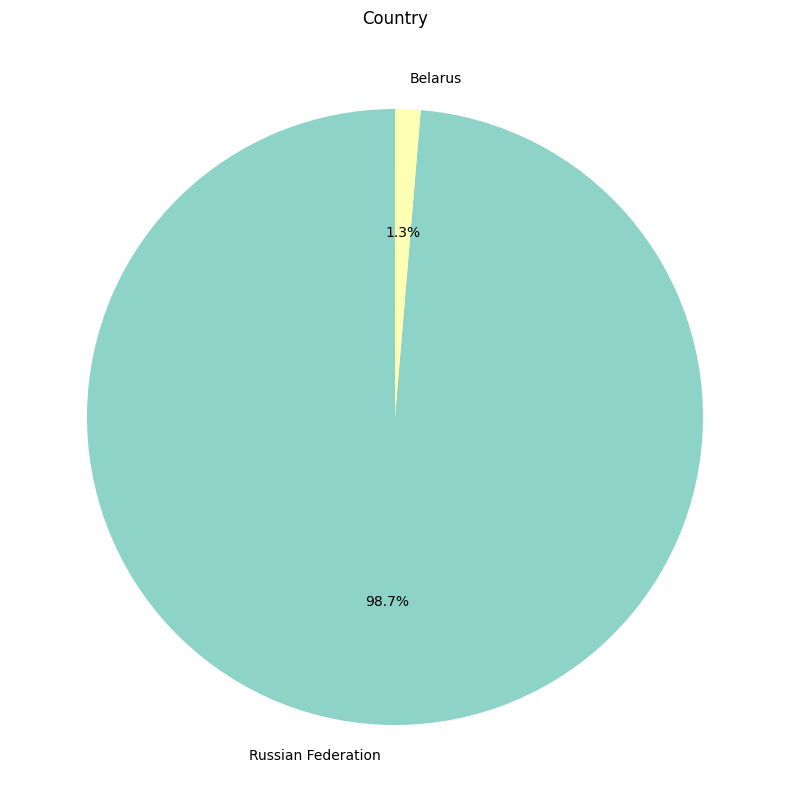

In [5]:
f.piechart(df_customer, 'Country', 0.001)

Region
Moscow              62
Chelyabinsk          7
Khabarovsk           6
Saint Petersburg     6
Perm                 5
                    ..
Maloyaroslavets      1
Smolensk             1
Naryan-Mar           1
Dolgoprudny          1
Yakutsk              1
Name: count, Length: 87, dtype: int64


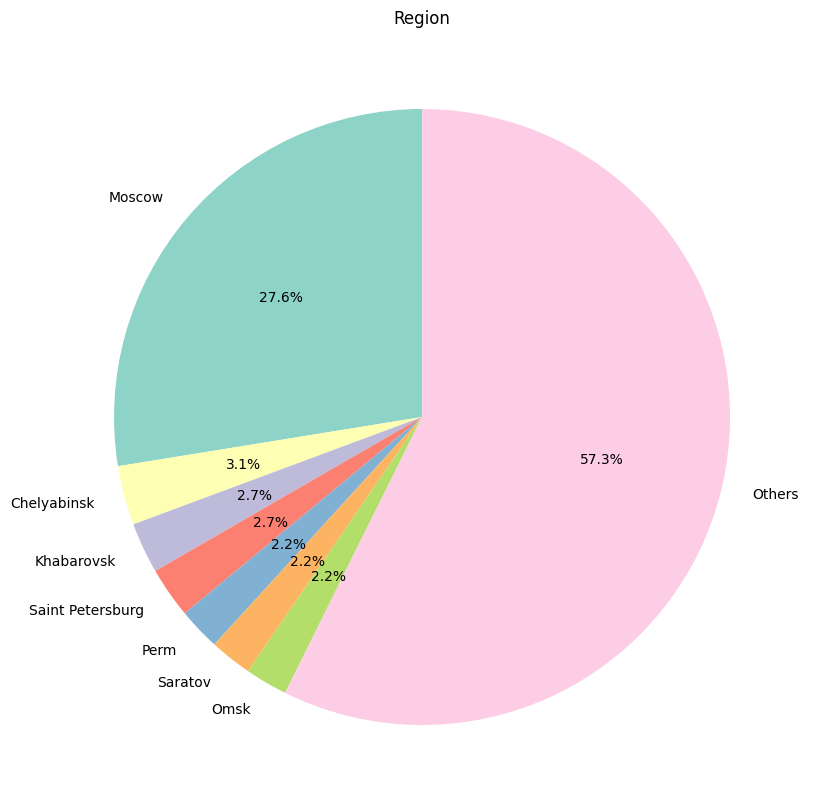

In [6]:
f.piechart(df_customer, 'Region', 0.018)

In [7]:
df_customer.columns

Index(['CustomerID', 'CustomerName', 'Region', 'Country', 'PriceCategory',
       'CustomerClass', 'LeadSource', 'Discontinued'],
      dtype='object')

Intentar ver la relación entre price category, customerclass, leadsource

Discontinued
0    199
1     26
Name: count, dtype: int64


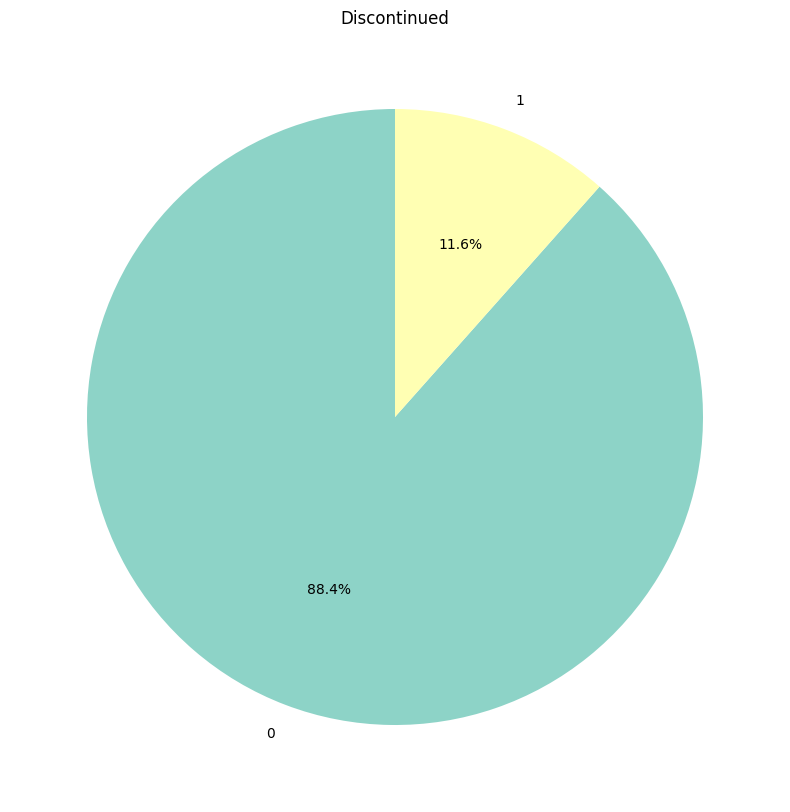

In [8]:
f.piechart(df_customer, 'Discontinued', 0.02)

LeadSource
Advertisement in National Wholesale Magazine     93
Sales Calls or Visits                            56
Referral by the Central Office                   50
Other                                            14
Trade Shows                                       3
Referral by Third Parties                         3
Organic Search                                    1
Advertisement in Regional Wholesaler Magazine     1
Name: count, dtype: int64


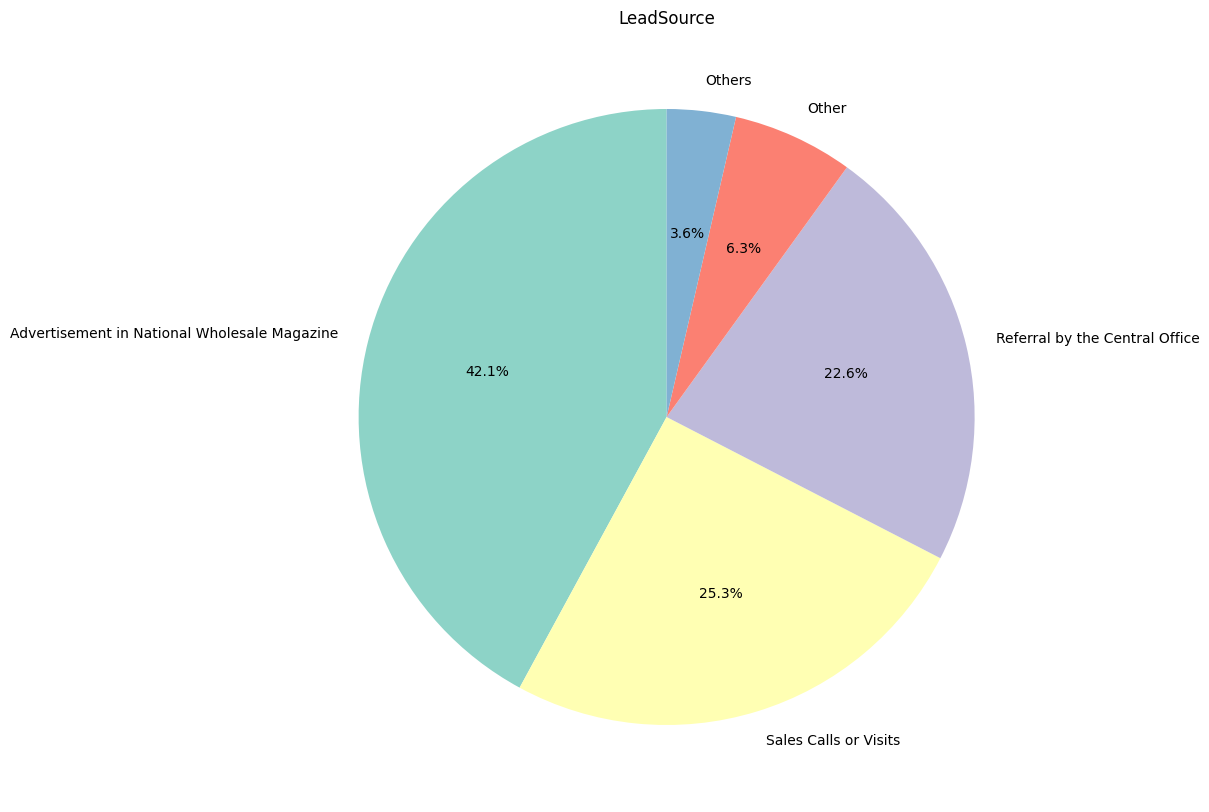

In [9]:
f.piechart(df_customer, 'LeadSource', 0.02)

CustomerClass
Small-Scale Wholesaler      95
Retailer                    69
Large-Scale Wholesaler-1    41
Large-Scale Wholesaler-2    15
Consumer                     3
Branch                       1
HyPermarket                  1
Name: count, dtype: int64


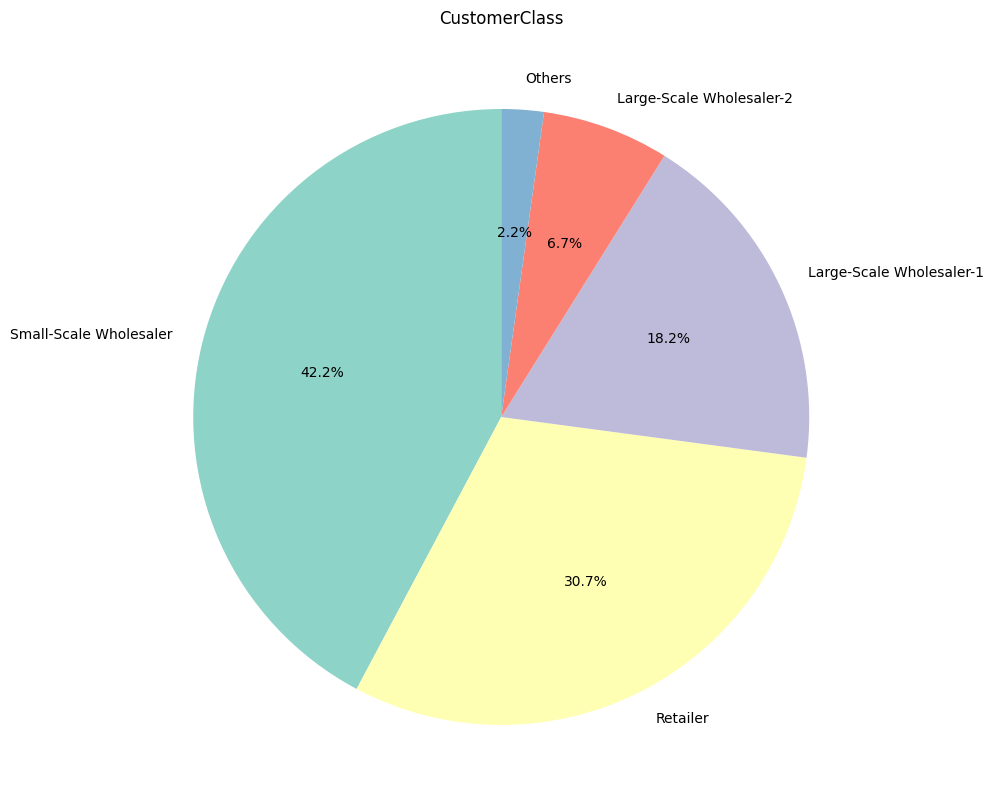

In [10]:
f.piechart(df_customer, 'CustomerClass' , 0.02)

PriceCategory
5    83
4    81
1    41
2    16
7     2
6     1
3     1
Name: count, dtype: int64


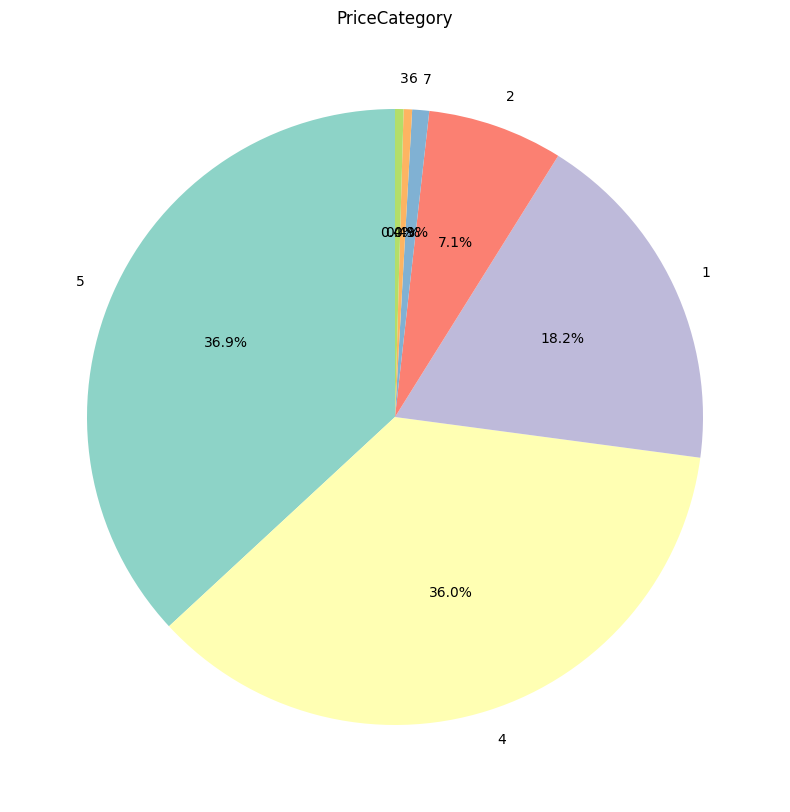

In [11]:
f.piechart(df_customer, 'PriceCategory', 0.001)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2943711627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="CustomerID", data=df_region, palette="viridis")


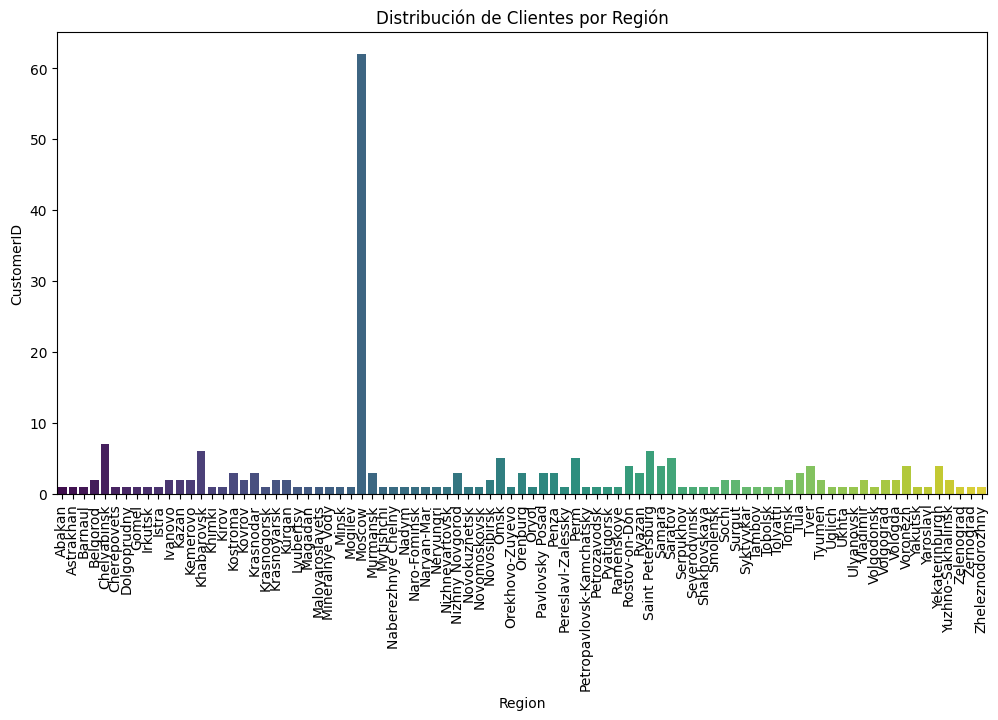

In [12]:
# Agrupar clientes por región
df_region = df_customer.groupby("Region")["CustomerID"].count().reset_index()

# Graficar mapa de clientes
plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="CustomerID", data=df_region, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribución de Clientes por Región")
plt.show()


Intentar ver la relación entre price category, customerclass, leadsource

In [13]:
df_customer.columns

Index(['CustomerID', 'CustomerName', 'Region', 'Country', 'PriceCategory',
       'CustomerClass', 'LeadSource', 'Discontinued'],
      dtype='object')

In [14]:
df_customer.groupby('CustomerClass').agg({
    'LeadSource': lambda x: ', '.join(map(str, x.unique())),
    'PriceCategory': lambda x: ', '.join(map(str, x.unique()))
})


,LeadSource,PriceCategory
CustomerClass,,
Branch,Other,6
Consumer,Other,"1, 5, 7"
HyPermarket,Other,3
Large-Scale Wholesaler-1,"Referral by the Central Office, Other, Sales C...","1, 4, 2"
Large-Scale Wholesaler-2,"Referral by the Central Office, Advertisement ...","2, 5, 1"
Retailer,"Other, Advertisement in National Wholesale Mag...","5, 7, 4"
Small-Scale Wholesaler,"Advertisement in National Wholesale Magazine, ...","4, 5, 2"


### Clientes que tardar en pagar

In [15]:
df_order_payment.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'CustomerID', 'EmployeeID',
       'ShippingMethodID', 'OrderDate', 'ShipDate', 'FreightCharge',
       'DeliveryTime', 'OrderYear', 'OrderMonth', 'PaymentMethod', 'PaymentID',
       'PaymentDate', 'PaymentAmount', 'PaymentDelay'],
      dtype='object')

In [16]:
df_delay_payments = df_order_payment.groupby(by=['CustomerID', 'PaymentDelay']).agg(
    TotalSales = ('PaymentAmount', 'sum')
).reset_index()

df_delay_payments

,CustomerID,PaymentDelay,TotalSales
0,1,0,333615.90
1,1,1,48877.70
2,1,2,98160.00
3,2,-7,53100.96
4,2,-3,25473.36
...,...,...,...
164,79,0,7722.00
165,84,0,384914.65
166,186,0,1017347.55
167,208,13,26875.00


In [17]:
df_delay_payments['PaymentDelay'].mean() # mean to pay: 1.73 days

np.float64(1.7337278106508875)

In [18]:
df_delay_payments['PaymentDelay'].min(), df_delay_payments['PaymentDelay'].max() # range (-366, 34) days 

(np.int64(-366), np.int64(34))

In [19]:
# correlation between total sales and payment delay

correlation = df_delay_payments['PaymentDelay'].corr(df_delay_payments['TotalSales'])
correlation # there isn't correlation between total sales and payment delay days 

np.float64(0.0011742767855377914)

In [20]:
# average of sales depends on payment delay 

delay_ranges = pd.cut(df_delay_payments['PaymentDelay'], bins=[-366, -5, 0, 10, 30, 60])
avg_sales_per_delay = df_delay_payments.groupby(delay_ranges)['TotalSales'].mean()
print(avg_sales_per_delay)

PaymentDelay
(-366, -5]     53100.960000
(-5, 0]       641276.272097
(0, 10]       141547.541512
(10, 30]      240668.539333
(30, 60]       55392.267500
Name: TotalSales, dtype: float64


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\1070188549.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_per_delay = df_delay_payments.groupby(delay_ranges)['TotalSales'].mean()


<Axes: >

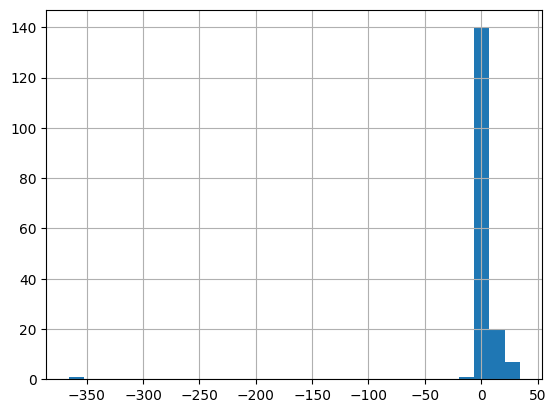

In [21]:
# distribution of delay payments 


df_delay_payments['PaymentDelay'].hist(bins=30)

In [22]:
df_delay_payments_no_outliers = df_delay_payments[df_delay_payments['PaymentDelay'] > -25]

In [23]:
df_delay_payments_no_outliers['PaymentDelay'].mean()

np.float64(3.9226190476190474)

In [24]:
correlation = df_delay_payments_no_outliers['PaymentDelay'].corr(df_delay_payments_no_outliers['TotalSales'])
correlation # there isn't correlation between total sales and payment delay days 

np.float64(-0.08974516719608538)

In [25]:
# average of sales depends on payment delay 

delay_ranges = pd.cut(df_delay_payments_no_outliers['PaymentDelay'], bins=[-10, 0, 10, 30, 60])
avg_sales_per_delay_no_outliers = df_delay_payments_no_outliers.groupby(delay_ranges)['TotalSales'].mean()
print(avg_sales_per_delay_no_outliers)

PaymentDelay
(-10, 0]    631940.156032
(0, 10]     141547.541512
(10, 30]    240668.539333
(30, 60]     55392.267500
Name: TotalSales, dtype: float64


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\468970678.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_per_delay_no_outliers = df_delay_payments_no_outliers.groupby(delay_ranges)['TotalSales'].mean()


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\3403780491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_per_delay_no_outliers.index.astype(str), y=avg_sales_per_delay_no_outliers.values, palette='viridis')


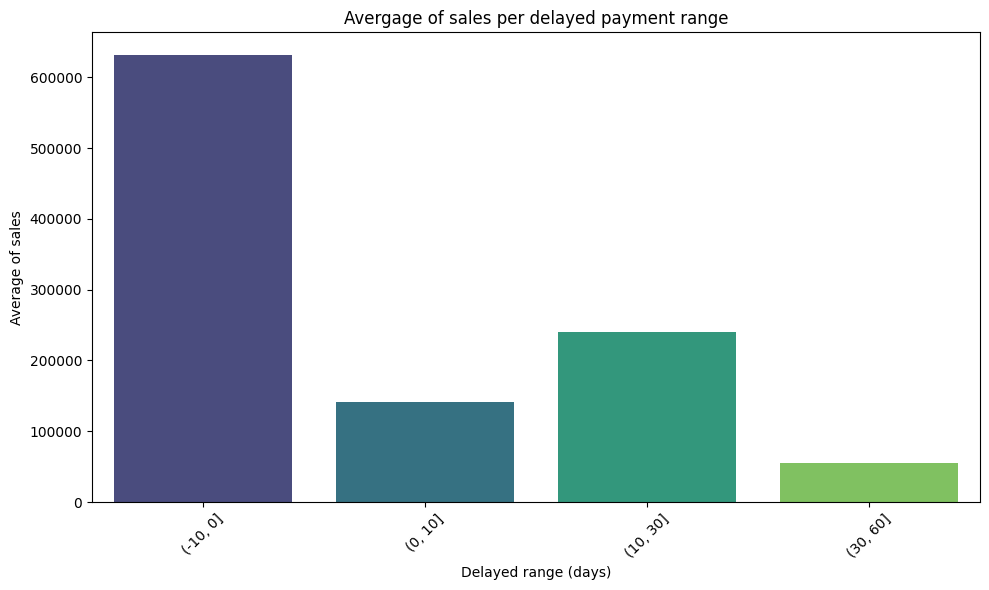

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_per_delay_no_outliers.index.astype(str), y=avg_sales_per_delay_no_outliers.values, palette='viridis')
plt.title('Avergage of sales per delayed payment range')
plt.xlabel('Delayed range (days)')
plt.ylabel('Average of sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\1672539697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_per_delay.index.astype(str), y=avg_sales_per_delay.values, palette='viridis')


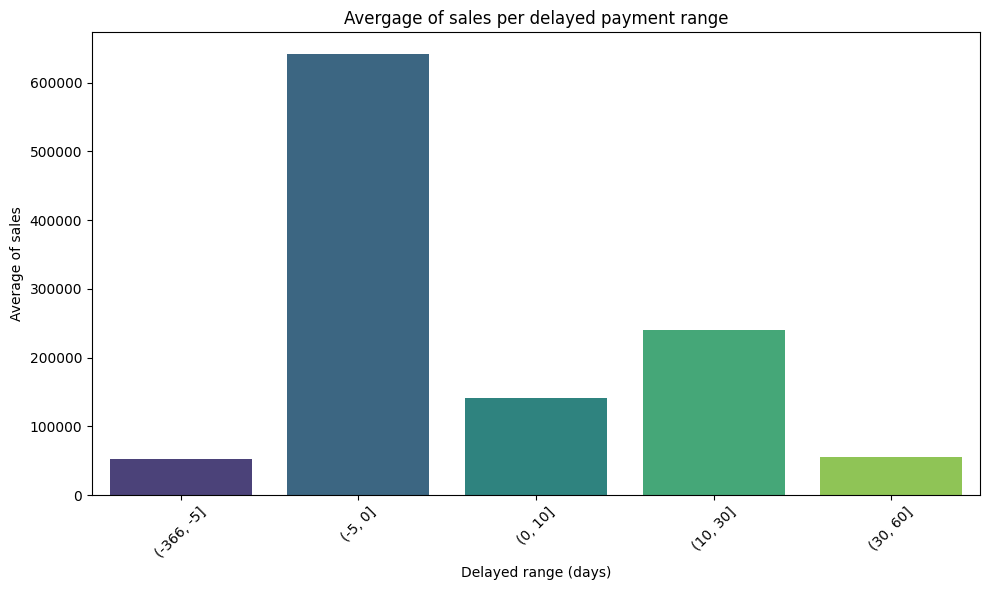

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_per_delay.index.astype(str), y=avg_sales_per_delay.values, palette='viridis')
plt.title('Avergage of sales per delayed payment range')
plt.xlabel('Delayed range (days)')
plt.ylabel('Average of sales')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

We can observe that the sales with an anticipated payment are higher than sales with delayed payments

#### Customer segmentation

In [28]:
timely_payments = df_delay_payments[df_delay_payments['PaymentDelay'] <= 0]
late_payments = df_delay_payments[df_delay_payments['PaymentDelay'] > 0]

avg_sales_timely = timely_payments['TotalSales'].mean()
avg_sales_late = late_payments['TotalSales'].mean()
print(f"Sales average of timely payments: {avg_sales_timely}")
print(f"Sales average of late payments: {avg_sales_late}")

Sales average of timely payments: 622151.9160937499
Sales average of late payments: 152425.57838095236


In [29]:
# Customer with the lastest payments

top_late_clients = df_delay_payments[df_delay_payments['PaymentDelay'] > 0].sort_values('PaymentDelay', ascending=False).head(10)
top_late_clients[['CustomerID', 'PaymentDelay', 'TotalSales']]


,CustomerID,PaymentDelay,TotalSales
18,2,34,168935.36
168,208,32,22631.76
17,2,31,8142.20
84,22,31,21859.75
43,7,30,0.00
16,2,22,69109.92
15,2,21,143048.40
14,2,18,81396.48
152,63,18,621590.30
147,60,16,241842.24


In [30]:
top_late_clients_list = list(set(top_late_clients['CustomerID'].tolist()))
top_late_clients_list

[2, 7, 208, 22, 60, 63]

In [31]:
top_10_latest_customer = df_customer[df_customer['CustomerID'].isin(top_late_clients_list)]
top_10_latest_customer

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued
1,2,C2,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
6,7,C7,Moscow,Russian Federation,1,Consumer,Other,1
21,22,C22,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0
55,60,C56,Kirov,Russian Federation,4,Small-Scale Wholesaler,Advertisement in National Wholesale Magazine,0
58,63,C59,Surgut,Russian Federation,4,Small-Scale Wholesaler,Advertisement in National Wholesale Magazine,0
188,208,C189,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0


General caracteristics of delayed payments

In [32]:
df_delay_payments = df_delay_payments[df_delay_payments['PaymentDelay'] > 0]
df_delay_payments

,CustomerID,PaymentDelay,TotalSales
1,1,1,48877.70
2,1,2,98160.00
6,2,1,504102.47
7,2,2,1177193.61
8,2,3,5828.00
...,...,...,...
153,64,8,553997.73
154,64,15,428746.40
157,67,4,10544.00
167,208,13,26875.00


In [33]:
clients_delayed = list(set(df_delay_payments['CustomerID'].to_list()))
clients_delayed

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 35,
 36,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 67,
 208]

In [34]:
df_customer_delayed = df_customer[df_customer['CustomerID'].isin(clients_delayed)]
df_customer_delayed

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued
0,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
1,2,C2,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
2,3,C3,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,1
3,4,C4,Moscow,Russian Federation,4,Large-Scale Wholesaler-1,Referral by the Central Office,1
4,5,C5,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
5,6,C6,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
6,7,C7,Moscow,Russian Federation,1,Consumer,Other,1
7,8,C8,Moscow,Russian Federation,5,Consumer,Other,1
8,9,C9,Moscow,Russian Federation,5,Retailer,Other,1
11,12,C12,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,1


In [35]:
df_customer_delayed['Region'].value_counts()

Region
Moscow             28
Omsk                2
Murmansk            2
Surgut              2
Perm                1
Samara              1
Yekaterinburgh      1
Voronezh            1
Zelenograd          1
Khabarovsk          1
Nizhny Novgorod     1
Tver                1
Sochi               1
Ulyanovsk           1
Kirov               1
Severodvinsk        1
Chelyabinsk         1
Name: count, dtype: int64

In [36]:
df_customer_delayed['PriceCategory'].value_counts()

PriceCategory
1    18
5    14
4     8
2     6
7     1
Name: count, dtype: int64

In [37]:
df_customer_delayed['CustomerClass'].value_counts()

CustomerClass
Large-Scale Wholesaler-1    20
Retailer                    14
Small-Scale Wholesaler       7
Large-Scale Wholesaler-2     4
Consumer                     2
Name: count, dtype: int64

In [38]:
df_customer_delayed['LeadSource'].value_counts()

LeadSource
Referral by the Central Office                  22
Advertisement in National Wholesale Magazine    20
Other                                            4
Sales Calls or Visits                            1
Name: count, dtype: int64

In [39]:
df_customer_delayed['Discontinued'].value_counts()

Discontinued
0    37
1    10
Name: count, dtype: int64

Como conclusión podemos decir que los clientes que tardan más en pagar son: 
- Moscow (pero esto no es muy representativo porque la mayoría son de allí)
- Son clientes habituales
- Están aquí por haber sido recomendados en la oficina central
- Large-Scale Wholesaler-1 
- Price Category: 1

#### Retraso de pagos por fecha

In [40]:
df_order_payment

,OrderDetailID,OrderID,ProductID,QuantitySold,UnitSalesPrice,total_price,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,PaymentMethod,PaymentID,PaymentDate,PaymentAmount,PaymentDelay
0,2,2,955,5,7.5,37.5,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,Cash,1,2003-07-10,603.50,0
1,3,2,958,5,8.5,42.5,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,Cash,1,2003-07-10,603.50,0
2,5,2,959,5,8.5,42.5,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,Cash,1,2003-07-10,603.50,0
3,6,4,72,50,3.0,150.0,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7,Cash,2,2003-07-12,1288.00,1
4,7,4,9,50,3.2,160.0,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7,Cash,2,2003-07-12,1288.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,80085,1864,3128,10,6.3,63.0,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,Cash,693,2005-09-10,526.32,32
22072,80086,1864,3126,10,5.9,59.0,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,Cash,692,2005-08-22,625.00,13
22073,80086,1864,3126,10,5.9,59.0,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,Cash,693,2005-09-10,526.32,32
22074,80087,1864,3131,9,7.5,67.5,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,Cash,692,2005-08-22,625.00,13


In [41]:
df_order_payment.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'CustomerID', 'EmployeeID',
       'ShippingMethodID', 'OrderDate', 'ShipDate', 'FreightCharge',
       'DeliveryTime', 'OrderYear', 'OrderMonth', 'PaymentMethod', 'PaymentID',
       'PaymentDate', 'PaymentAmount', 'PaymentDelay'],
      dtype='object')

In [42]:
#Filter no outliers

df_no_outliers = df_order_payment[df_order_payment['PaymentDelay'] <= df_order_payment['PaymentDelay'].quantile(0.95)]

In [43]:
df_no_outliers['Month-Year'] = df_no_outliers['OrderYear'].astype(str) + '-' + df_no_outliers['OrderMonth'].astype(str).str.zfill(2)
df_no_outliers['Year-Month-Date'] = pd.to_datetime(df_no_outliers['Month-Year'], format='%Y-%m')
df_no_outliers = df_no_outliers.sort_values(by='Year-Month-Date')
df_no_outliers[['Month-Year', 'Year-Month-Date']].head()

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\3207287325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month-Year'] = df_no_outliers['OrderYear'].astype(str) + '-' + df_no_outliers['OrderMonth'].astype(str).str.zfill(2)
C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\3207287325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Year-Month-Date'] = pd.to_datetime(df_no_outliers['Month-Year'], format='%Y-%m')


,Month-Year,Year-Month-Date
0,2003-07,2003-07-01
499,2003-07,2003-07-01
500,2003-07,2003-07-01
501,2003-07,2003-07-01
502,2003-07,2003-07-01


In [44]:
avg_sales_per_month = df_no_outliers.groupby(['Year-Month-Date'])['PaymentAmount'].mean().reset_index()
avg_delay_per_month = df_no_outliers.groupby(['Year-Month-Date'])['PaymentDelay'].mean().reset_index()

avg_delay_per_month

,Year-Month-Date,PaymentDelay
0,2003-07-01,0.264550
1,2003-08-01,0.581680
2,2003-09-01,0.621134
3,2003-10-01,0.228903
4,2003-11-01,1.655020
5,2003-12-01,1.589328
6,2004-01-01,2.466836
7,2004-02-01,2.255673
8,2004-03-01,0.759542
9,2004-04-01,-2.381650


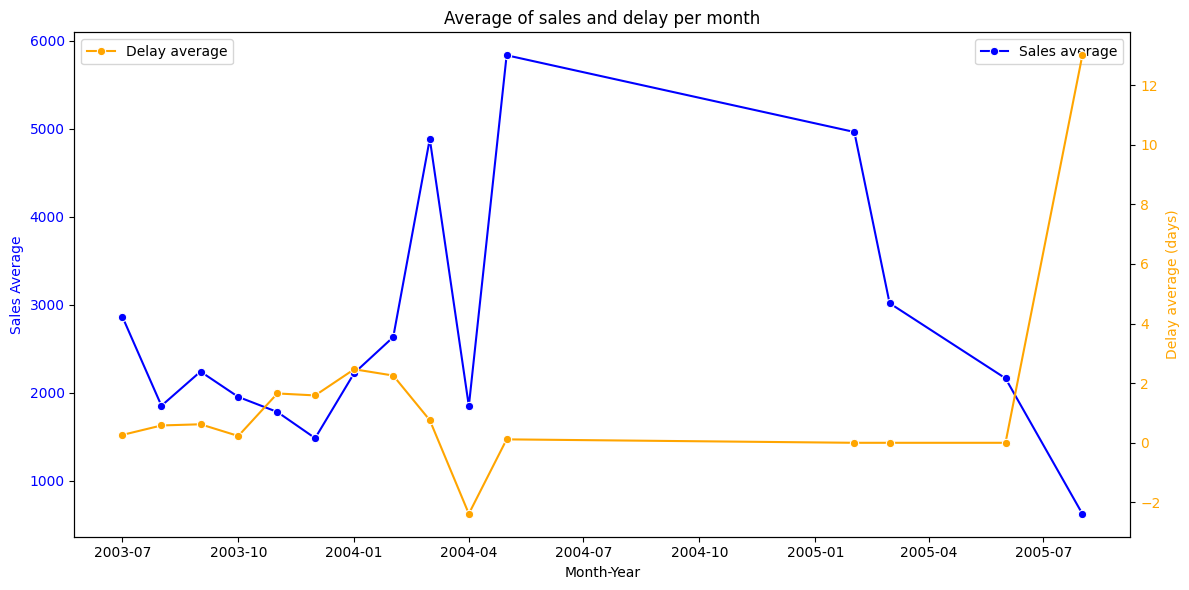

In [45]:

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(x='Year-Month-Date', y='PaymentAmount', data= avg_sales_per_month,  label='Sales average', color='blue', marker='o', ax=ax1)
ax1.set_xlabel('Month-Year')
ax1.set_ylabel('Sales Average', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
sns.lineplot(x='Year-Month-Date', y='PaymentDelay', data= avg_delay_per_month, label='Delay average', color='orange', marker='o', ax=ax2)
ax2.set_ylabel('Delay average (days)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Mejorar la visualización
plt.title('Average of sales and delay per month')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Es curisoso, cuando aumentan las ventas disminuye los retrasos en el pago y viceversa

### Dias de entrega

In [46]:
df_order_payment.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'CustomerID', 'EmployeeID',
       'ShippingMethodID', 'OrderDate', 'ShipDate', 'FreightCharge',
       'DeliveryTime', 'OrderYear', 'OrderMonth', 'PaymentMethod', 'PaymentID',
       'PaymentDate', 'PaymentAmount', 'PaymentDelay'],
      dtype='object')

<Axes: >

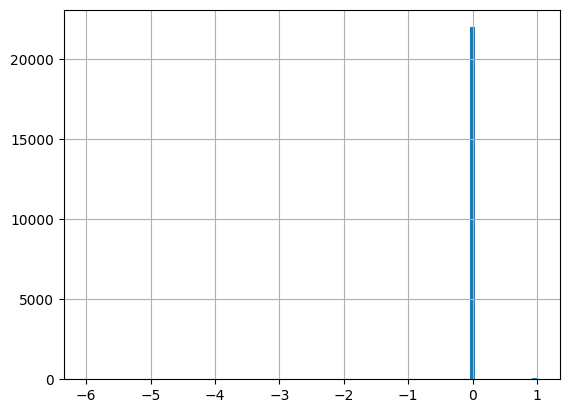

In [47]:
df_order_payment['DeliveryTime'].hist(bins=87)

In [48]:
df_order_payment['DeliveryTime'].mean(
    
)

np.float64(-0.0069759014314187354)

In [49]:
df_order_payment['DeliveryTime'].min(), df_order_payment['DeliveryTime'].max()

(np.int64(-6), np.int64(1))

In [50]:
df_order_payment['DeliveryTime'].value_counts() # outliersss

DeliveryTime
 0    21971
 1       53
-3       35
-6       17
Name: count, dtype: int64

### 1.1 Total de ventas por región

In [51]:
df_ventas_region = df_customer.merge(df_orders, on="CustomerID").merge(df_total_payments, on="OrderID")
df_ventas_region

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued,OrderID,EmployeeID,...,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,PaymentMethod,PaymentID,PaymentDate,PaymentAmount
0,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,2,1,...,2003-07-10,2003-07-10,0.0,0,2003,7,Cash,1,2003-07-10,603.50
1,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,26,1,...,2003-07-24,2003-07-24,0.0,0,2003,7,Cash,27,2003-07-24,1457.00
2,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,86,1,...,2003-08-19,2003-08-19,0.0,0,2003,8,Cash,89,2003-08-19,2348.20
3,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,158,2,...,2003-09-23,2003-09-23,0.0,0,2003,9,Cash,163,2003-09-23,726.30
4,1,C1,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,299,2,...,2003-11-18,2003-11-18,0.0,0,2003,11,Cash,299,2003-11-18,1585.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,186,C168,Saint Petersburg,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,1541,6,...,2005-03-09,2005-03-09,31.0,0,2005,3,Cash,697,2005-03-09,954.95
680,186,C168,Saint Petersburg,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,1546,12,...,2005-03-11,2005-03-11,31.0,0,2005,3,Cash,698,2005-03-11,1233.00
681,186,C168,Saint Petersburg,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,1662,6,...,2005-06-04,2005-06-04,31.0,0,2005,6,Cash,699,2005-06-04,2163.60
682,208,C189,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,1864,1,...,2005-08-09,2005-08-09,31.0,0,2005,8,Cash,692,2005-08-22,625.00


In [52]:
df_ventas_region = df_ventas_region.groupby('Region').agg(
    TotalVentas = ('PaymentAmount', 'sum'), 
    NumeroClientes = ('CustomerID', 'nunique')
    ).reset_index()
df_ventas_region

,Region,TotalVentas,NumeroClientes
0,Chelyabinsk,4129.47,1
1,Khabarovsk,13028.87,1
2,Kirov,11541.96,1
3,Krasnogorsk,366.90,1
4,Mogilev,506.20,1
5,Moscow,586422.08,40
6,Murmansk,21930.14,2
7,Nizhny Novgorod,6632.27,1
8,Novomoskovsk,466.10,1
9,Omsk,14149.33,2


In [53]:
df_ventas_region = df_ventas_region.sort_values(by='TotalVentas', ascending=False)
df_ventas_region

,Region,TotalVentas,NumeroClientes
5,Moscow,586422.08,40
13,Perm,95752.79,2
23,Yekaterinburgh,34832.75,2
6,Murmansk,21930.14,2
14,Saint Petersburg,15040.55,1
19,Surgut,14229.43,2
9,Omsk,14149.33,2
22,Voronezh,13645.28,2
1,Khabarovsk,13028.87,1
2,Kirov,11541.96,1


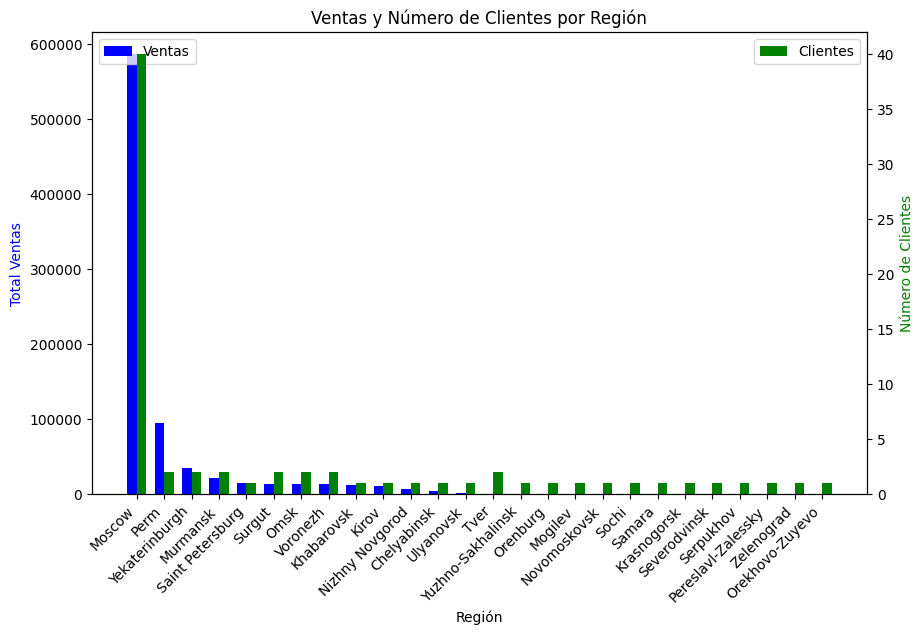

In [54]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = np.arange(len(df_ventas_region))  
width = 0.35  

# Gráfico de barras para las ventas
bars1 = ax1.bar(x - width / 2, df_ventas_region['TotalVentas'], width, label='Ventas', color='blue')

# Crear un segundo eje Y para las barras de clientes
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width / 2, df_ventas_region['NumeroClientes'], width, label='Clientes', color='green')

# Etiquetas y título
ax1.set_xlabel('Región')
ax1.set_ylabel('Total Ventas', color='blue')
ax2.set_ylabel('Número de Clientes', color='green')
ax1.set_xticks(x)
ax1.set_xticklabels(df_ventas_region['Region'], rotation=45, ha="right")  # Rotación de 45 grados


ax1.set_title('Ventas y Número de Clientes por Región')

# Leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

### Número de pedidos por cliente

In [55]:
df_orders

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth
0,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7
1,4,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7
2,5,2,1,1,2003-07-15,2003-07-15,0.0,0,2003,7
3,6,3,1,1,2003-07-14,2003-07-14,0.0,0,2003,7
4,7,4,1,1,2003-07-14,2003-07-15,0.0,1,2003,7
...,...,...,...,...,...,...,...,...,...,...
2281,2466,40,8,1,2006-04-14,2006-04-14,0.0,0,2006,4
2282,2467,7,8,1,2006-04-14,2006-04-14,0.0,0,2006,4
2283,2468,82,8,1,2006-04-18,2006-04-18,31.0,0,2006,4
2284,2469,231,8,1,2006-04-19,2006-04-19,0.0,0,2006,4


In [56]:
df_pedidos_clientes = df_orders.merge(df_order_details, on = 'OrderID')
df_pedidos_clientes = df_pedidos_clientes.merge(df_customer, on = 'CustomerID')
df_pedidos_clientes = df_pedidos_clientes.merge(df_total_payments, on = 'OrderID')
df_pedidos_clientes

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,...,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued,PaymentMethod,PaymentID,PaymentDate,PaymentAmount
0,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1,2003-07-10,603.50
1,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1,2003-07-10,603.50
2,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1,2003-07-10,603.50
3,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1,2003-07-10,603.50
4,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0,Cash,1,2003-07-10,603.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,693,2005-09-10,526.32
22072,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,692,2005-08-22,625.00
22073,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,693,2005-09-10,526.32
22074,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,...,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0,Cash,692,2005-08-22,625.00


In [57]:
df_ventas_lead = df_pedidos_clientes.groupby(['LeadSource', 'CustomerID']).agg(
    TotalVentas = ('PaymentAmount', 'sum'),
    NumeroPedidos = ('OrderID', 'count')).reset_index().sort_values(by='TotalVentas', ascending=False)

In [58]:
df_ventas_lead

,LeadSource,CustomerID,TotalVentas,NumeroPedidos
52,Referral by the Central Office,13,12171699.78,1317
49,Referral by the Central Office,5,10850843.52,2646
46,Referral by the Central Office,2,7661120.01,3020
59,Referral by the Central Office,24,3589240.10,984
12,Advertisement in National Wholesale Magazine,42,3327990.63,612
...,...,...,...,...
8,Advertisement in National Wholesale Magazine,31,1513.20,13
39,Other,32,799.93,32
38,Other,9,544.70,17
2,Advertisement in National Wholesale Magazine,15,112.40,4


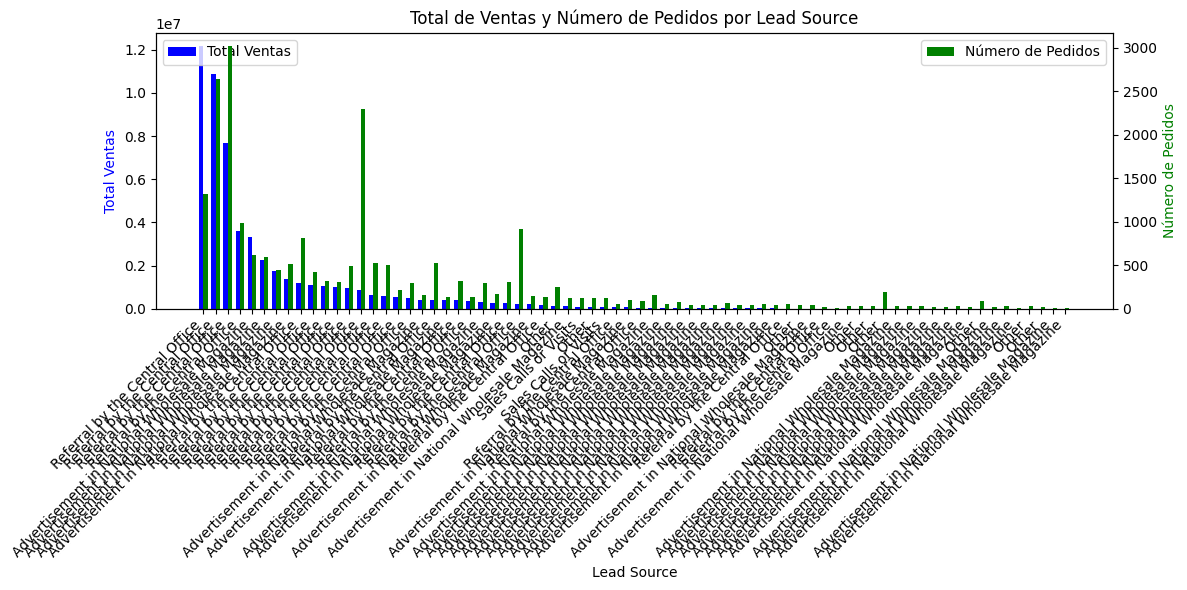

In [59]:
import matplotlib.pyplot as plt
import numpy as np


# Configuración para el gráfico de barras dobles
fig, ax1 = plt.subplots(figsize=(12, 6))

# Las posiciones para las barras
x = np.arange(len(df_ventas_lead))  # Posiciones para las barras en el eje X
width = 0.35  # Ancho de las barras

# Gráfico de barras para las ventas
bars1 = ax1.bar(x - width / 2, df_ventas_lead['TotalVentas'], width, label='Total Ventas', color='blue')

# Crear un segundo eje Y para las barras de clientes
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width / 2, df_ventas_lead['NumeroPedidos'], width, label='Número de Pedidos', color='green')

# Etiquetas y título
ax1.set_xlabel('Lead Source')
ax1.set_ylabel('Total Ventas', color='blue')
ax2.set_ylabel('Número de Pedidos', color='green')
ax1.set_xticks(x)
ax1.set_xticklabels(df_ventas_lead['LeadSource'], rotation=45, ha="right")  # Rotación de 45 grados

# Título del gráfico
ax1.set_title('Total de Ventas y Número de Pedidos por Lead Source')

# Leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta para que no se solapen las etiquetas
plt.show()


### Fuente de clientes más rentable

Podemos observar como en nuestro caso, la fuente de captación de clientes más rentable es **Advertisement in National Wholesale Magazine** debido a que con un número relativamente bajo de clientes obtenemos un alto valor medio de las ventas. 

In [60]:
df_pedidos_clientes.groupby(['LeadSource']).agg(
    TotalVentas = ('PaymentAmount', 'mean'),
    NumeroPedidos = ('OrderID', 'count')).reset_index().sort_values(by='TotalVentas', ascending = False)

,LeadSource,TotalVentas,NumeroPedidos
2,Referral by the Central Office,2669.532854,16716
0,Advertisement in National Wholesale Magazine,2504.356776,4315
3,Sales Calls or Visits,656.092678,239
1,Other,292.049045,806


### Relación entre el costo de envío y el total de ventas por cliente

In [61]:
df_pedidos_clientes.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'ShippingMethodID', 'OrderDate',
       'ShipDate', 'FreightCharge', 'DeliveryTime', 'OrderYear', 'OrderMonth',
       'OrderDetailID', 'ProductID', 'QuantitySold', 'UnitSalesPrice',
       'total_price', 'CustomerName', 'Region', 'Country', 'PriceCategory',
       'CustomerClass', 'LeadSource', 'Discontinued', 'PaymentMethod',
       'PaymentID', 'PaymentDate', 'PaymentAmount'],
      dtype='object')

In [62]:
df_cliente = df_pedidos_clientes.groupby(['Region', 'CustomerID', 'PriceCategory',  'CustomerClass' ]).agg(
    TotalVentas = ('PaymentAmount', 'sum'), 
    TotalFreightCharge = ('FreightCharge', 'sum'), 
    TotalQuantity = ('QuantitySold', 'sum')
).reset_index()
df_cliente

,Region,CustomerID,PriceCategory,CustomerClass,TotalVentas,TotalFreightCharge,TotalQuantity
0,Chelyabinsk,64,1,Large-Scale Wholesaler-1,982744.13,13636.00,729
1,Khabarovsk,41,4,Small-Scale Wholesaler,1396208.61,0.00,2937
2,Kirov,60,4,Small-Scale Wholesaler,1763829.84,12544.80,2391
3,Krasnogorsk,68,5,Retailer,15409.80,0.00,82
4,Mogilev,33,5,Retailer,9684.40,0.00,82
...,...,...,...,...,...,...,...
67,Voronezh,34,4,Small-Scale Wholesaler,418277.30,0.00,1486
68,Yekaterinburgh,24,1,Large-Scale Wholesaler-1,3589240.10,11230.18,8496
69,Yekaterinburgh,84,1,Large-Scale Wholesaler-1,384914.65,0.00,1198
70,Yuzhno-Sakhalinsk,74,4,Small-Scale Wholesaler,83865.25,0.00,158


In [63]:
df_cliente['FreightVsVentas'] = df_cliente['TotalFreightCharge'] / df_cliente['TotalVentas']

<Axes: >

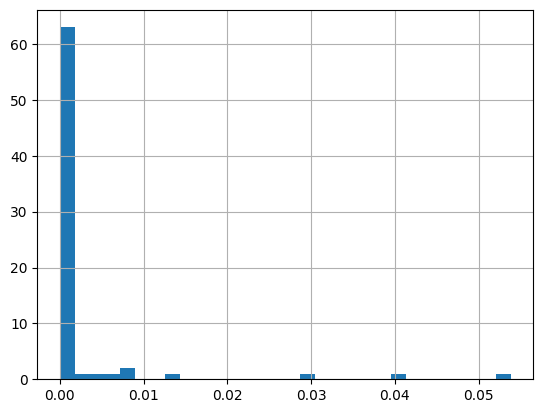

In [64]:
df_cliente['FreightVsVentas'].hist(bins=30)

In [65]:
df_cliente_sorted = df_cliente.sort_values(by='FreightVsVentas', ascending=False)
df_cliente_sorted.head(60)

,Region,CustomerID,PriceCategory,CustomerClass,TotalVentas,TotalFreightCharge,TotalQuantity,FreightVsVentas
44,Moscow,208,2,Large-Scale Wholesaler-2,49506.76,2666.00,754,0.053851
52,Orenburg,69,5,Retailer,40146.24,1597.14,121,0.039783
65,Ulyanovsk,54,5,Retailer,57333.74,1690.49,593,0.029485
0,Chelyabinsk,64,1,Large-Scale Wholesaler-1,982744.13,13636.00,729,0.013875
56,Saint Petersburg,186,1,Large-Scale Wholesaler-1,1017347.55,8370.00,2358,0.008227
47,Nizhny Novgorod,25,1,Large-Scale Wholesaler-1,382699.70,2959.75,1529,0.007734
2,Kirov,60,4,Small-Scale Wholesaler,1763829.84,12544.80,2391,0.007112
45,Murmansk,42,4,Small-Scale Wholesaler,3327990.63,14945.87,5657,0.004491
68,Yekaterinburgh,24,1,Large-Scale Wholesaler-1,3589240.10,11230.18,8496,0.003129
55,Perm,13,1,Large-Scale Wholesaler-1,12171699.78,11445.08,21394,0.000940


### **Estudio clientes**
- ¿Cuánto gastan en promedio y con qué frecuencia compran?
- ¿Se podrían segmentar los clientes para ofrecerles estrategias personalizadas? --> Habría que sacar la última compra del cliente, la frecuencia con la que compran y cuanto gastan en total (Se puede hacer con RFM Analysis)
- Sacar un mapa de los clientes (sería interesante para el dashboard)


- ¿Cuánto gastan en promedio y con qué frecuencia compran?

**Nº de pedidos por clientes**

In [66]:
n_pedidos_clientes = df_orders.groupby('CustomerID')['OrderID'].count().reset_index()
n_pedidos_clientes = n_pedidos_clientes.rename(columns={'OrderID': 'N_orders'})
n_pedidos_clientes

,CustomerID,N_orders
0,1,28
1,2,126
2,3,56
3,4,25
4,5,130
...,...,...
217,243,1
218,244,2
219,245,1
220,246,1


In [67]:
n_pedidos_clientes.sort_values(by='N_orders', ascending=False)

,CustomerID,N_orders
21,22,188
37,40,131
4,5,130
1,2,126
6,7,121
...,...,...
214,240,1
217,243,1
216,242,1
219,245,1


In [68]:
n_pedidos_clientes['N_orders'].mean()

np.float64(10.26126126126126)

<Axes: >

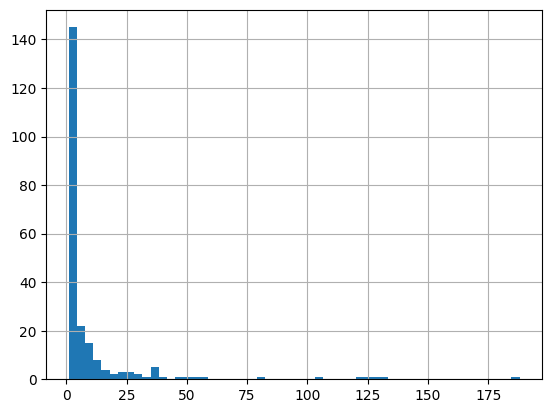

In [69]:
n_pedidos_clientes['N_orders'].hist(bins=55)

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\3704144325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CustomerID', y='N_orders', data=n_pedidos_clientes, palette='coolwarm')


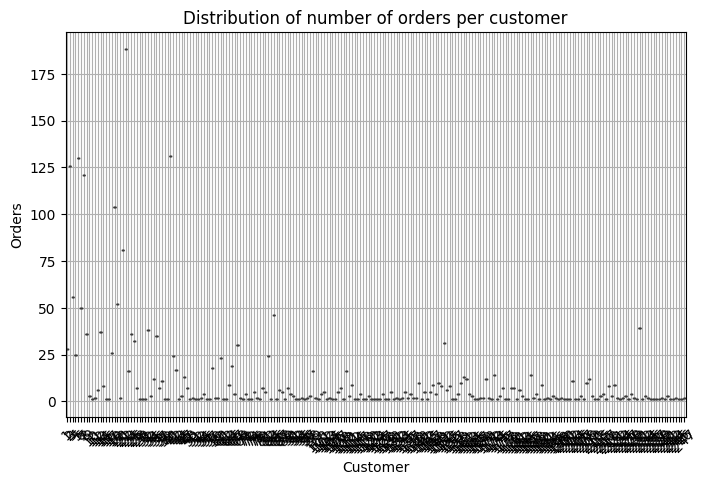

In [70]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='CustomerID', y='N_orders', data=n_pedidos_clientes, palette='coolwarm')
plt.title('Distribution of number of orders per customer')
plt.xlabel('Customer')
plt.ylabel('Orders')
plt.grid(True)
plt.xticks(rotation = 45)

plt.show()

<Axes: ylabel='N_orders'>

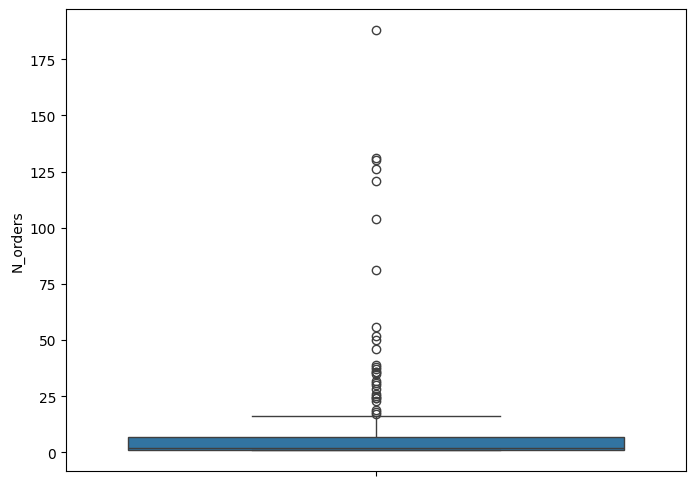

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(y=n_pedidos_clientes['N_orders'])



*¿Quién son los que más compran?*

In [72]:
top_customer = n_pedidos_clientes[n_pedidos_clientes['N_orders'] > 100]['CustomerID'].tolist()
top_customer

[2, 5, 7, 18, 22, 40]

In [73]:
df_customer[df_customer['CustomerID'].isin(top_customer)]

,CustomerID,CustomerName,Region,Country,PriceCategory,CustomerClass,LeadSource,Discontinued
1,2,C2,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
4,5,C5,Moscow,Russian Federation,1,Large-Scale Wholesaler-1,Referral by the Central Office,0
6,7,C7,Moscow,Russian Federation,1,Consumer,Other,1
17,18,C18,Moscow,Russian Federation,2,Large-Scale Wholesaler-1,Referral by the Central Office,0
21,22,C22,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0
37,40,C38,Moscow,Russian Federation,2,Large-Scale Wholesaler-2,Referral by the Central Office,0


Los clientes que más pedidos realizan:
- Moscow
- Price Category: 1-2
- Son mayoristas, a excepcion de uno que es consumidor
- Han sido recomendados por la oficina central --> esta es la fuente más rentable de capatación de clientes
- En su mayoría son continuos 

**¿Cuánto gastan los clientes en media por pedido?**

In [74]:
df_orders_sales = pd.merge(df_orders, df_order_details, on = 'OrderID')
df_orders_sales = pd.merge(df_orders_sales, df_total_payments, on = 'OrderID')
df_orders_sales

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,OrderDetailID,ProductID,QuantitySold,UnitSalesPrice,total_price,PaymentMethod,PaymentID,PaymentDate,PaymentAmount
0,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,2,955,5,7.5,37.5,Cash,1,2003-07-10,603.50
1,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,3,958,5,8.5,42.5,Cash,1,2003-07-10,603.50
2,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,5,959,5,8.5,42.5,Cash,1,2003-07-10,603.50
3,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,8,715,30,4.7,141.0,Cash,1,2003-07-10,603.50
4,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,9,421,10,5.1,51.0,Cash,1,2003-07-10,603.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80085,3128,10,6.3,63.0,Cash,693,2005-09-10,526.32
22072,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80086,3126,10,5.9,59.0,Cash,692,2005-08-22,625.00
22073,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80086,3126,10,5.9,59.0,Cash,693,2005-09-10,526.32
22074,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80087,3131,9,7.5,67.5,Cash,692,2005-08-22,625.00


In [75]:
df_orders_sales['CustomerID'].value_counts()

CustomerID
2     3020
5     2646
22    2294
13    1317
24     984
      ... 
47      17
31      13
79      12
15       4
10       4
Name: count, Length: 72, dtype: int64

In [76]:
total_sales = df_orders_sales.groupby('CustomerID').agg(
    TotalSales = ('PaymentAmount', 'sum')
).reset_index()

total_sales

,CustomerID,TotalSales
0,1,480653.60
1,2,7661120.01
2,3,577140.39
3,4,634796.37
4,5,10850843.52
...,...,...
67,74,83865.25
68,79,7722.00
69,84,384914.65
70,186,1017347.55


In [77]:
orders_sales = pd.merge(total_sales, n_pedidos_clientes, on = 'CustomerID')
orders_sales

,CustomerID,TotalSales,N_orders
0,1,480653.60,28
1,2,7661120.01,126
2,3,577140.39,56
3,4,634796.37,25
4,5,10850843.52,130
...,...,...,...
67,74,83865.25,5
68,79,7722.00,7
69,84,384914.65,46
70,186,1017347.55,14


In [78]:
orders_sales['Sales/Orders'] = orders_sales['TotalSales'] / orders_sales['N_orders']
orders_sales

,CustomerID,TotalSales,N_orders,Sales/Orders
0,1,480653.60,28,17166.200000
1,2,7661120.01,126,60802.539762
2,3,577140.39,56,10306.078393
3,4,634796.37,25,25391.854800
4,5,10850843.52,130,83468.027077
...,...,...,...,...
67,74,83865.25,5,16773.050000
68,79,7722.00,7,1103.142857
69,84,384914.65,46,8367.709783
70,186,1017347.55,14,72667.682143


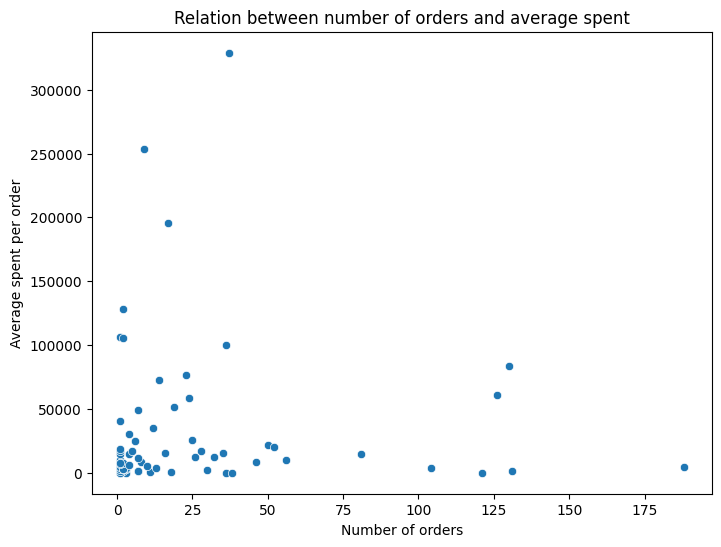

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = orders_sales["N_orders"], y=orders_sales["Sales/Orders"])

# Etiquetas
plt.xlabel("Number of orders")
plt.ylabel("Average spent per order")
plt.title("Relation between number of orders and average spent")

# Mostrar gráfico
plt.show()

Podemos observar que los que más pedidos hacen son los que menos se gastan en cada uno y viceversa

In [80]:
orders_sales['N_orders'].corr(orders_sales['Sales/Orders']) # no muy significante


np.float64(0.024825066167577105)

In [81]:
orders_sales['N_orders'].corr(orders_sales['TotalSales']) # en el computo global si es positiva la correlacion --> mientras mas pedidos mas gasta

np.float64(0.41836982932439226)

**Frecuencia con la que compran los clientes**

Para ello, vamos a calcular la diferencia de días entre un pedido y otro

In [82]:
df_orders_sales.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'ShippingMethodID', 'OrderDate',
       'ShipDate', 'FreightCharge', 'DeliveryTime', 'OrderYear', 'OrderMonth',
       'OrderDetailID', 'ProductID', 'QuantitySold', 'UnitSalesPrice',
       'total_price', 'PaymentMethod', 'PaymentID', 'PaymentDate',
       'PaymentAmount'],
      dtype='object')

In [83]:
df_orders_sales['OrderDate'] = pd.to_datetime(df_orders_sales['OrderDate'])
df_orders_sales['ShipDate']  = pd.to_datetime(df_orders_sales['ShipDate'])

In [84]:
df_orders_sales.dtypes

OrderID                      int64
CustomerID                   int64
EmployeeID                   int64
ShippingMethodID             int64
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
FreightCharge              float64
DeliveryTime                 int64
OrderYear                    int64
OrderMonth                   int64
OrderDetailID                int64
ProductID                    int64
QuantitySold                 int64
UnitSalesPrice             float64
total_price                float64
PaymentMethod               object
PaymentID                    int64
PaymentDate                 object
PaymentAmount              float64
dtype: object

In [85]:
df_orders_sales = df_orders_sales.sort_values(by=['CustomerID', 'OrderDate' ])
df_orders_sales

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,OrderDetailID,ProductID,QuantitySold,UnitSalesPrice,total_price,PaymentMethod,PaymentID,PaymentDate,PaymentAmount
0,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,2,955,5,7.5,37.5,Cash,1,2003-07-10,603.50
1,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,3,958,5,8.5,42.5,Cash,1,2003-07-10,603.50
2,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,5,959,5,8.5,42.5,Cash,1,2003-07-10,603.50
3,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,8,715,30,4.7,141.0,Cash,1,2003-07-10,603.50
4,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,9,421,10,5.1,51.0,Cash,1,2003-07-10,603.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80085,3128,10,6.3,63.0,Cash,693,2005-09-10,526.32
22072,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80086,3126,10,5.9,59.0,Cash,692,2005-08-22,625.00
22073,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80086,3126,10,5.9,59.0,Cash,693,2005-09-10,526.32
22074,1864,208,1,1,2005-08-09,2005-08-09,31.0,0,2005,8,80087,3131,9,7.5,67.5,Cash,692,2005-08-22,625.00


In [86]:
df_pedidos = df_orders_sales.groupby(['CustomerID', 'OrderID'])['OrderDate'].min().reset_index()
df_pedidos

,CustomerID,OrderID,OrderDate
0,1,2,2003-07-10
1,1,26,2003-07-24
2,1,86,2003-08-19
3,1,158,2003-09-23
4,1,299,2003-11-18
...,...,...,...
651,186,1531,2005-03-01
652,186,1541,2005-03-09
653,186,1546,2005-03-11
654,186,1662,2005-06-04


In [87]:
df_pedidos = df_pedidos.sort_values(by=['CustomerID', 'OrderDate'])
df_pedidos

,CustomerID,OrderID,OrderDate
0,1,2,2003-07-10
1,1,26,2003-07-24
2,1,86,2003-08-19
3,1,158,2003-09-23
4,1,299,2003-11-18
...,...,...,...
651,186,1531,2005-03-01
652,186,1541,2005-03-09
653,186,1546,2005-03-11
654,186,1662,2005-06-04


In [88]:
df_pedidos['DaysBetween'] = df_pedidos.groupby('CustomerID')['OrderDate'].diff().dt.days
df_pedidos

,CustomerID,OrderID,OrderDate,DaysBetween
0,1,2,2003-07-10,NaN
1,1,26,2003-07-24,14.0
2,1,86,2003-08-19,26.0
3,1,158,2003-09-23,35.0
4,1,299,2003-11-18,56.0
...,...,...,...,...
651,186,1531,2005-03-01,0.0
652,186,1541,2005-03-09,8.0
653,186,1546,2005-03-11,2.0
654,186,1662,2005-06-04,85.0


In [89]:
customer_frequency = df_pedidos.groupby('CustomerID')['DaysBetween'].mean().reset_index()
customer_frequency = customer_frequency.rename(columns={'DaysBetween':'AvgDaysBetweenOrders'})
customer_frequency

,CustomerID,AvgDaysBetweenOrders
0,1,28.888889
1,2,5.107143
2,3,7.484848
3,4,10.173913
4,5,3.613333
...,...,...
67,74,NaN
68,79,NaN
69,84,0.000000
70,186,20.400000


In [90]:
customer_frequency = customer_frequency.dropna()

In [91]:
customer_frequency.isna().sum()

CustomerID              0
AvgDaysBetweenOrders    0
dtype: int64

In [92]:
customer_frequency['AvgDaysBetweenOrders'].mean()

np.float64(29.50050628485988)

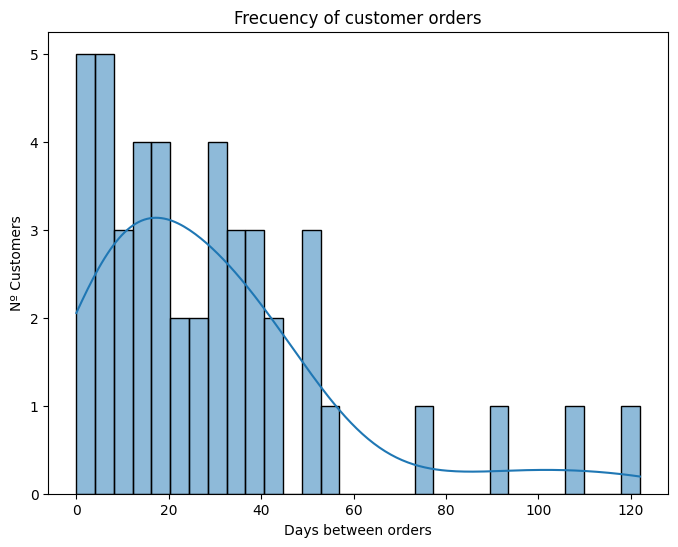

In [93]:
plt.figure(figsize=(8,6))
sns.histplot(customer_frequency['AvgDaysBetweenOrders'], bins=30, kde=True)

plt.xlabel('Days between orders')
plt.ylabel('Nº Customers')
plt.title('Frecuency of customer orders')
plt.show()

*Relación entre la frecuencia de compra y número de pedidos*

In [94]:
orders_sales

,CustomerID,TotalSales,N_orders,Sales/Orders
0,1,480653.60,28,17166.200000
1,2,7661120.01,126,60802.539762
2,3,577140.39,56,10306.078393
3,4,634796.37,25,25391.854800
4,5,10850843.52,130,83468.027077
...,...,...,...,...
67,74,83865.25,5,16773.050000
68,79,7722.00,7,1103.142857
69,84,384914.65,46,8367.709783
70,186,1017347.55,14,72667.682143


In [95]:
df_orders_frequency = pd.merge(orders_sales, customer_frequency, on = 'CustomerID')
df_orders_frequency

,CustomerID,TotalSales,N_orders,Sales/Orders,AvgDaysBetweenOrders
0,1,480653.60,28,17166.200000,28.888889
1,2,7661120.01,126,60802.539762,5.107143
2,3,577140.39,56,10306.078393,7.484848
3,4,634796.37,25,25391.854800,10.173913
4,5,10850843.52,130,83468.027077,3.613333
5,6,1097869.14,50,21957.382800,14.842105
6,7,5726.10,121,47.323140,8.058824
7,8,2943.90,36,81.775000,15.294118
8,9,544.70,3,181.566667,17.500000
9,11,2750.30,2,1375.150000,28.000000


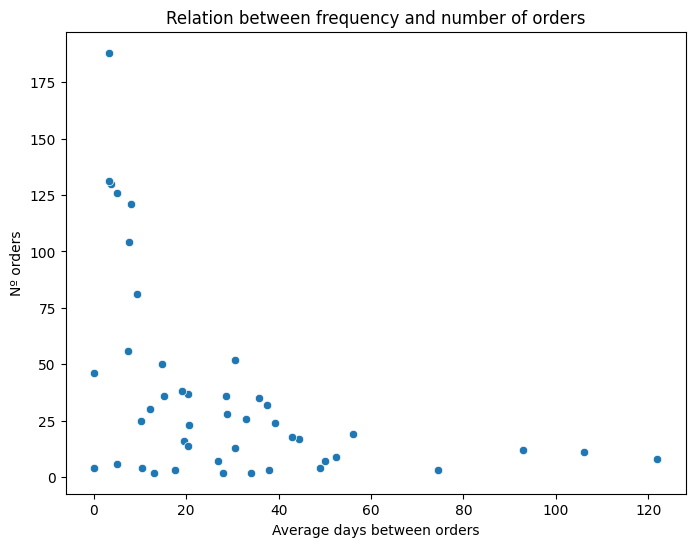

In [96]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_orders_frequency['AvgDaysBetweenOrders'], y = df_orders_frequency['N_orders'])
plt.xlabel('Average days between orders')
plt.ylabel('Nº orders')
plt.title('Relation between frequency and number of orders')
plt.show()

In [97]:
df_orders_frequency['AvgDaysBetweenOrders'].corr(df_orders_frequency['N_orders'])

np.float64(-0.44664743016193775)

A mayor número de pedidos menos días entre los pedidos

### **Análisis de Ventas**

- Total de Ventas, con ello estudiaremos cuales son los productos que más ingresos generan
- Productos más vendidos, identificaremos los productos con mayor cantidad vendida
- Ingresos por categoría, veremos que categoria de productos produce más ingresos
- Tendencias temporales

In [98]:
df_ventas = df_order_details.merge(df_products, on = 'ProductID')
df_ventas

,OrderDetailID,OrderID,ProductID,QuantitySold,UnitSalesPrice,total_price,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
0,2,2,955,5,7.5,37.5,XXL-PCL29,PCL,Drawers,Women's Panties,Underwear,997,XXL,Dozen,In Production,2003-07-10,7.15,PCL29
1,3,2,958,5,8.5,42.5,XXL-PCL31S,PCL,Drawers,Women's Panties,Underwear,1110,XXL,Dozen,In Production,2003-07-10,8.30,PCL31S
2,5,2,959,5,8.5,42.5,XXL-PCL31T,PCL,Drawers,Women's Panties,Underwear,1055,XXL,Dozen,In Production,2003-07-10,7.20,PCL31T
3,6,4,72,50,3.0,150.0,2-ERK61,ERK,Briefs,Boys' Briefs,Underwear,233,S,Dozen,In Production,2003-07-10,2.50,ERK61
4,7,4,9,50,3.2,160.0,3-ERK61,ERK,Briefs,Boys' Briefs,Underwear,325,M,Dozen,In Production,2003-07-10,2.70,ERK61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105535,114665,2470,4342,20,1.7,34.0,M-BX46KK,BX,Boxers,Men's Briefs,Underwear,75,M,Single Unit,In Production,2006-03-20,1.20,BX46KK
105536,114666,2470,4419,10,1.9,19.0,L-BX46CK,BX,Boxers,Men's Briefs,Underwear,90,L,Single Unit,In Production,2006-04-04,1.30,BX46CK
105537,114667,2470,4343,20,1.9,38.0,L-BX46KK,BX,Boxers,Men's Briefs,Underwear,85,L,Single Unit,In Production,2006-03-20,1.30,BX46KK
105538,114668,2470,4421,10,2.1,21.0,XL-BX46CK,BX,Boxers,Men's Briefs,Underwear,100,XL,Single Unit,In Production,2006-04-04,1.40,BX46CK


#### 1. Total de Ventas

In [99]:
df_ventas.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType'],
      dtype='object')

In [100]:
df_ventas['TotalVentas'] = df_ventas['UnitSalesPrice'] * df_ventas['QuantitySold']

In [101]:
df_ventas['TotalVentas'].sum() #en el dashboard convendria sacar las ventas del ultimo año

np.float64(3950215.2699999996)

Los productos que más ingresos generan son *Briefs* y *Drawers*

In [102]:
df_ventas.groupby(['ProductName', 'ModelDescription', 'Category'])['TotalVentas'].sum().reset_index().sort_values(by='TotalVentas', ascending= False).head(50)

,ProductName,ModelDescription,Category,TotalVentas
2015,M-ERK61,ERK,Briefs,34526.2
1100,L-ERK61,ERK,Briefs,31979.5
3894,XXL-K46,K,Briefs,28693.7
3574,XL-K46,K,Briefs,28068.3
475,3XL-K46,K,Briefs,25395.8
3475,XL-ERK61,ERK,Briefs,25203.3
1216,L-K46,K,Briefs,24194.0
3914,XXL-K4673,K,Briefs,22387.8
338,3-ERK61,ERK,Briefs,22091.6
3594,XL-K4673,K,Briefs,22009.8


### 2. Productos más vendidos

Los que se venden más cantidad son a su vez los mismos que más ventas generan

In [103]:
df_ventas.groupby(['ProductName', 'ModelDescription', 'Category']).agg(
    TotalVentas = ('TotalVentas', 'sum'), 
    TotalQuantity = ('QuantitySold', 'sum')).reset_index().sort_values(by='TotalQuantity', ascending= False)

,ProductName,ModelDescription,Category,TotalVentas,TotalQuantity
2015,M-ERK61,ERK,Briefs,34526.2,7517
1100,L-ERK61,ERK,Briefs,31979.5,6230
338,3-ERK61,ERK,Briefs,22091.6,6193
204,2-ERK61,ERK,Briefs,18601.3,5588
2788,S-ERK61,ERK,Briefs,21579.3,5166
...,...,...,...,...,...
2006,M-EES60TB,EES,Briefs,11.0,1
3271,XL-B4627SKD,B,Briefs,8.8,1
2213,M-O360S,O,Briefs,3.5,1
4017,XXL-S46S,S,Briefs,7.8,1


### 3. Ingresos por categoría vs margen de ganancia

In [104]:
df_ventas.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType',
       'TotalVentas'],
      dtype='object')

In [105]:
df_ventas['ProfitMargin'] = df_ventas['UnitSalesPrice'] - df_ventas['PurchasePrice']
df_ventas['ProfitMarginPercentage'] = df_ventas['ProfitMargin'] / df_ventas['PurchasePrice']
df_ventas['ProfitMarginTotal'] = df_ventas['ProfitMargin'] * df_ventas['QuantitySold']

In [106]:
df_resultado = df_ventas.groupby('Category').agg(
    TotalSales = ('TotalVentas', 'sum'), 
    RealProfit = ('ProfitMarginTotal', 'sum'), 
    TotalQuantity = ('QuantitySold', 'sum')
    ).reset_index().sort_values(by = 'RealProfit', ascending=False)

In [107]:
df_resultado['ProfitMargin%'] = (df_resultado['RealProfit'] / df_resultado['TotalSales']) * 100
df_resultado = df_resultado.sort_values(by='ProfitMargin%', ascending=False)
df_resultado

,Category,TotalSales,RealProfit,TotalQuantity,ProfitMargin%
2,Cuff-Over the Calf,407.80,177.70,39,43.575282
4,Regular-Over the Calf,25922.20,11166.20,3180,43.075819
5,Slips,2336.10,929.15,2300,39.773554
6,Thongs,171333.10,60479.05,32245,35.299104
7,Undershirts,258616.70,91100.79,35853,35.226182
0,Boxers,67259.80,21177.50,43174,31.486118
1,Briefs,3264478.37,932497.13,548363,28.564966
3,Drawers,159861.20,40285.51,16211,25.200305


Vale, aqui observamos que a pesar de ser nuestra mejor categoria 'Briefs' no es la que más beneficios obtenemos. Dos medidas:
- Regular el precio
- Potenciar las ventas de otros productos con mayor rentabilidad que ya vendemos bastante como *Thongs* o *Undershits*

### 4. Margen de ganancia por producto

In [108]:
df_ventas.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType',
       'TotalVentas', 'ProfitMargin', 'ProfitMarginPercentage',
       'ProfitMarginTotal'],
      dtype='object')

In [109]:
average_profit = df_ventas.groupby(['ProductName', 'Category'])['ProfitMarginPercentage'].mean().reset_index()
average_profit

,ProductName,Category,ProfitMarginPercentage
0,1-157,Undershirts,0.686047
1,1-158,Undershirts,0.755208
2,1-160,Undershirts,0.777778
3,1-161,Undershirts,0.626894
4,1-162,Undershirts,0.620873
...,...,...,...
4025,XXL-SLP46S,Slips,0.538462
4026,XXL-SLP46SD,Slips,0.552941
4027,XXL-U29,Briefs,0.593915
4028,XXL-U35,Briefs,0.439241


In [110]:
top_10 = average_profit.sort_values(by='ProfitMarginPercentage', ascending=False).head(10)
top_10

,ProductName,Category,ProfitMarginPercentage
3055,S-TIEE03S,Thongs,2.225000
1983,M-EE1206,Briefs,2.190476
3054,S-TIEE03,Thongs,2.137500
1985,M-EE1206S,Briefs,1.934087
1069,L-EE1205S1,Briefs,1.900000
2923,S-TA7800S,Thongs,1.847440
2767,S-EE1206S,Briefs,1.798611
1984,M-EE12061,Briefs,1.721212
2428,M-TIEE1405S,Thongs,1.704545
2765,S-EE1206,Briefs,1.698864


*L-K40* y *L-BX64P* son productos que se deben descatalogar

In [111]:
bottom_10 = average_profit.sort_values(by='ProfitMarginPercentage', ascending=True).head(10)
bottom_10

,ProductName,Category,ProfitMarginPercentage
1187,L-K40,Briefs,-0.100610
1012,L-BX64P,Boxers,-0.066667
200,2-BX64P,Boxers,0.079545
971,L-BX34B,Boxers,0.168498
2701,S-BX34B,Boxers,0.189394
1622,M-4204,Undershirts,0.200000
3008,S-TBA91,Thongs,0.200000
2976,S-TB4638,Thongs,0.200000
56,1-B3099DD,Briefs,0.203008
2151,M-K4675,Briefs,0.206710


### 5. Análisis de ventas por tamaño

Esto me indica que su sector es el de las tallas medias - grandes

Ventas por tamaño de producto:
Size
M        770000.55
XL       768768.50
L        760758.32
XXL      562742.60
S        415758.40
3XL      328977.70
4XL      151588.50
XS        88943.30
5XL       29432.60
6XL       22624.80
L-XL      12469.70
S-M       12050.30
40-46      7181.90
35-40      5053.40
9          3848.20
11         3839.30
7          3135.30
5          2450.80
13          591.10
Name: TotalVentas, dtype: float64


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2153620001.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_tamano.index, y=ventas_por_tamano.values, palette='coolwarm')


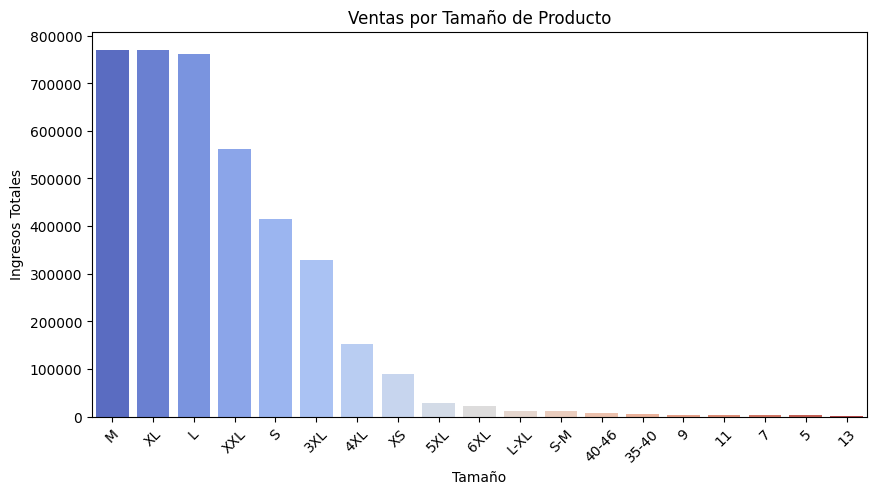

In [112]:
ventas_por_tamano = df_ventas.groupby('Size')['TotalVentas'].sum().sort_values(ascending=False)
print("Ventas por tamaño de producto:")
print(ventas_por_tamano)


plt.figure(figsize=(10, 5))
sns.barplot(x=ventas_por_tamano.index, y=ventas_por_tamano.values, palette='coolwarm')
plt.xlabel("Tamaño")
plt.ylabel("Ingresos Totales")
plt.title("Ventas por Tamaño de Producto")
plt.xticks(rotation=45) 
plt.show()

### 5. Tendecias Temporales

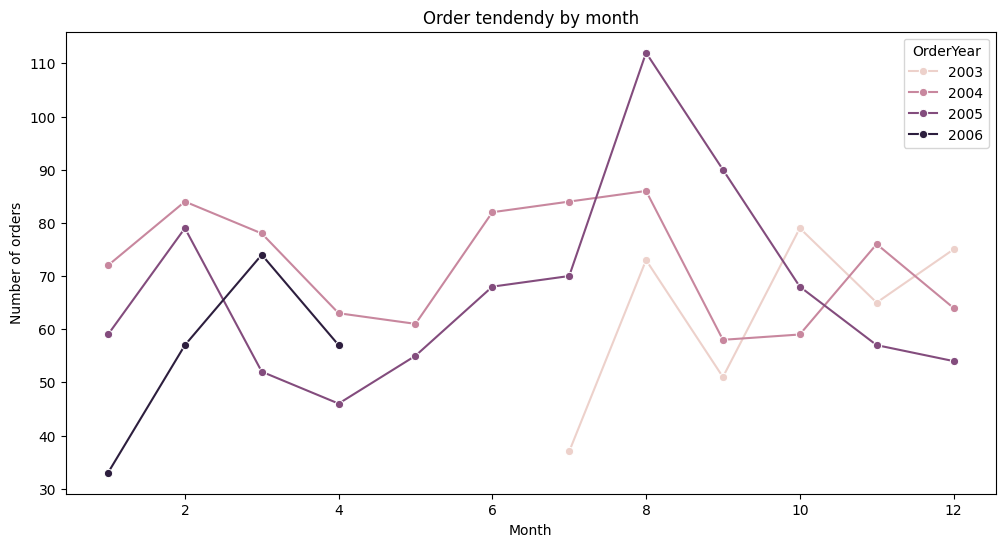

In [113]:
# Tendencias del nº de ofertas por mes 

monthly_orders = df_orders.groupby(["OrderYear", "OrderMonth"])["OrderID"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x="OrderMonth", y="OrderID", hue="OrderYear", marker="o")
plt.title("Order tendendy by month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.show()


Se observa que hay un incremento en agosto - septiembre y febrero como al inicio de la etapa escolar

**Mapa de Calor de Pedidos por Día y Mes**

In [114]:
df_orders['OrderDate'] = pd.to_datetime(df_orders['OrderDate'])

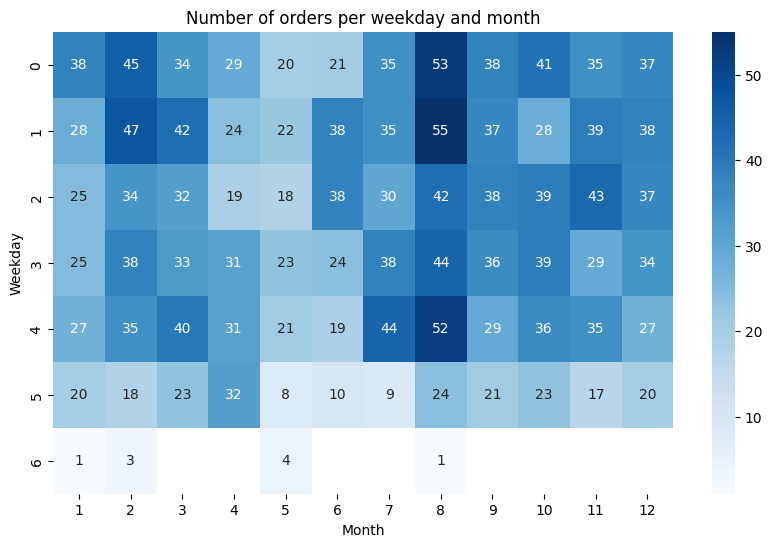

In [115]:
df_orders["OrderWeekday"] = df_orders["OrderDate"].dt.weekday  # 0 = Monday, 6 = Sunday

heatmap_data = df_orders.pivot_table(index="OrderWeekday", columns="OrderMonth", values="OrderID", aggfunc="count")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")
plt.title("Number of orders per weekday and month")
plt.xlabel("Month")
plt.ylabel("Weekday")
plt.show()


Podemos observar que en general, cuanto más se compran es a incio de semana en tendencia general todos los meses menos en agosto que es la misma cantidad en todos los días

**Tendencias de ventas por estación**

In [116]:
df_ventas_productos = pd.merge(df_orders, df_order_details, on='OrderID')
df_ventas_productos = pd.merge(df_ventas_productos, df_products, on='ProductID')
df_ventas_productos.columns


Index(['OrderID', 'CustomerID', 'EmployeeID', 'ShippingMethodID', 'OrderDate',
       'ShipDate', 'FreightCharge', 'DeliveryTime', 'OrderYear', 'OrderMonth',
       'OrderWeekday', 'OrderDetailID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType'],
      dtype='object')

In [117]:
df_ventas_productos.dtypes

OrderID                      int64
CustomerID                   int64
EmployeeID                   int64
ShippingMethodID             int64
OrderDate           datetime64[ns]
ShipDate                    object
FreightCharge              float64
DeliveryTime                 int64
OrderYear                    int64
OrderMonth                   int64
OrderWeekday                 int32
OrderDetailID                int64
ProductID                    int64
QuantitySold                 int64
UnitSalesPrice             float64
total_price                float64
ProductName                 object
ModelDescription            object
Category                    object
Gender                      object
ProductLine                 object
Weight                       int64
Size                        object
PackSize                    object
Status                      object
InventoryDate               object
PurchasePrice              float64
ProductType                 object
dtype: object

In [138]:
def get_season(month):
        
        
        
        if month in [12,1,2]:
            return 'Winter'
        elif month in [3,4,5]:
            return 'Spring'
        elif month in [6,7,8]:
            return 'Summer'
        else:
            return 'Automn'

In [139]:
df_ventas_productos['Season'] = df_ventas_productos['OrderMonth'].apply(get_season)

In [140]:
df_ventas_productos

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,...,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType,Season
0,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Women's Panties,Underwear,997,XXL,Dozen,In Production,2003-07-10,7.15,PCL29,Summer
1,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Women's Panties,Underwear,1110,XXL,Dozen,In Production,2003-07-10,8.30,PCL31S,Summer
2,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Women's Panties,Underwear,1055,XXL,Dozen,In Production,2003-07-10,7.20,PCL31T,Summer
3,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Women's Panties,Underwear,265,S,Dozen,Out of Production,2003-07-10,3.90,N80,Summer
4,2,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,...,Women's Panties,Underwear,256,M,Dozen,Out of Production,2003-07-10,3.90,C97S,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105051,2470,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,...,Men's Briefs,Underwear,75,M,Single Unit,In Production,2006-03-20,1.20,BX46KK,Spring
105052,2470,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,...,Men's Briefs,Underwear,90,L,Single Unit,In Production,2006-04-04,1.30,BX46CK,Spring
105053,2470,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,...,Men's Briefs,Underwear,85,L,Single Unit,In Production,2006-03-20,1.30,BX46KK,Spring
105054,2470,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,...,Men's Briefs,Underwear,100,XL,Single Unit,In Production,2006-04-04,1.40,BX46CK,Spring


In [141]:
df_ventas_productos['Season'].unique()

array(['Summer', 'Automn', 'Winter', 'Spring'], dtype=object)

In [142]:
# ventas por temporada y producto

ventas_temporada = df_ventas_productos.groupby(['Season', 'ProductName'])['QuantitySold'].sum().reset_index()

ventas_temporada = ventas_temporada.sort_values(by=['Season', 'QuantitySold'], ascending=[True, False])
ventas_temporada

,Season,ProductName,QuantitySold
1401,Automn,M-ERK61,1613
795,Automn,L-ERK61,1496
712,Automn,L-BX34A,1245
2347,Automn,XL-ERK61,1169
1913,Automn,S-ERK61,1138
...,...,...,...
9316,Winter,4-186,0
9335,Winter,4XL-174,0
9372,Winter,5-S1D501,0
9446,Winter,L-201S,0


In [143]:
# the top 10 best-selling products in each season
ventas_temporada["Rank"] = ventas_temporada.groupby("Season")["QuantitySold"].rank(method="dense", ascending=False)
ventas_top = ventas_temporada[ventas_temporada["Rank"] <= 10]

print(ventas_top)


       Season ProductName  QuantitySold  Rank
1401   Automn     M-ERK61          1613   1.0
795    Automn     L-ERK61          1496   2.0
712    Automn     L-BX34A          1245   3.0
2347   Automn    XL-ERK61          1169   4.0
1913   Automn     S-ERK61          1138   5.0
2443   Automn    XL-K4673          1022   6.0
2430   Automn      XL-K46          1014   7.0
2656   Automn     XXL-K46          1005   8.0
2670   Automn   XXL-K4673           973   9.0
892    Automn       L-K46           942  10.0
4385   Spring     M-ERK61          1008   1.0
5691   Spring      XL-K46           995   2.0
5660   Spring      XL-K29           987   3.0
3027   Spring     3-ERK61           961   4.0
3725   Spring       L-K46           958   5.0
3625   Spring     L-ERK61           945   6.0
5975   Spring     XXL-K46           924   7.0
2816   Spring     1-ERK61           910   8.0
2910   Spring     2-ERK61           901   9.0
3140   Spring     3XL-K46           896  10.0
6348   Summer     3-ERK61         

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\1599976999.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ventas_top_10 = ventas_temporada.groupby("Season").apply(lambda x: x.nlargest(10, "QuantitySold")).reset_index(drop=True)


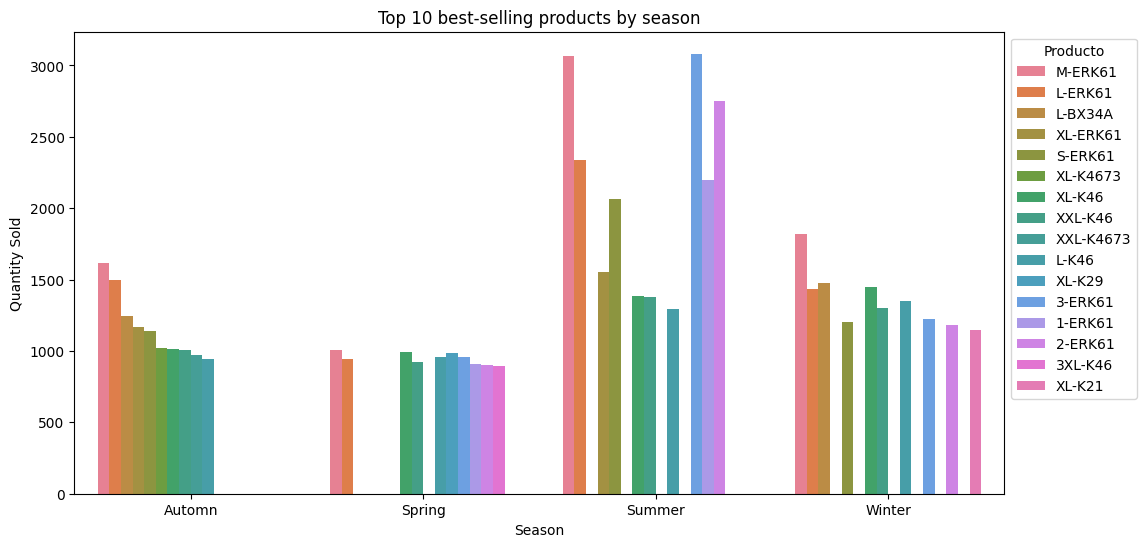

In [145]:
ventas_top_10 = ventas_temporada.groupby("Season").apply(lambda x: x.nlargest(10, "QuantitySold")).reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.barplot(data=ventas_top, x="Season", y="QuantitySold", hue="ProductName")

plt.xlabel("Season")
plt.ylabel("Quantity Sold")
plt.title("Top 10 best-selling products by season")
plt.legend(title="Producto", bbox_to_anchor=(1,1))

plt.show()


*Group by category*

In [146]:
def sold_tendecies_season(df, group, top = 10, top_figure = 10):
    
    season_sales = df.groupby(['Season', group])['QuantitySold'].sum().reset_index()
    season_sales = season_sales.sort_values(by=['Season', 'QuantitySold'], ascending=[True, False])
    print(season_sales)
    
    season_sales["Rank"] = season_sales.groupby("Season")["QuantitySold"].rank(method="dense", ascending=False)
    top_sales = season_sales[season_sales["Rank"] <= top]

    print(top_sales)
    
    top_sales_graph = season_sales.groupby("Season").apply(lambda x: x.nlargest(top_figure, "QuantitySold")).reset_index(drop=True)

    plt.figure(figsize=(12,6))
    sns.barplot(data=top_sales_graph, x="Season", y="QuantitySold", hue=group)

    plt.xlabel("Season")
    plt.ylabel("Quantity Sold")
    plt.title("Top 10 best-selling products by season")
    plt.legend(title="Product", bbox_to_anchor=(1,1))

    plt.show()

In [147]:
df_ventas_productos.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'ShippingMethodID', 'OrderDate',
       'ShipDate', 'FreightCharge', 'DeliveryTime', 'OrderYear', 'OrderMonth',
       'OrderWeekday', 'OrderDetailID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType', 'Season'],
      dtype='object')

    Season               Category  QuantitySold
1   Automn                 Briefs        115109
0   Automn                 Boxers          9921
7   Automn            Undershirts          7426
3   Automn                Drawers          4295
6   Automn                 Thongs          2042
4   Automn  Regular-Over the Calf          1667
5   Automn                  Slips           186
2   Automn     Cuff-Over the Calf            39
9   Spring                 Briefs        132943
13  Spring                 Thongs         16335
8   Spring                 Boxers         11100
14  Spring            Undershirts          8533
10  Spring                Drawers          2868
12  Spring                  Slips           675
11  Spring  Regular-Over the Calf             1
16  Summer                 Briefs        158245
20  Summer                 Thongs          9669
15  Summer                 Boxers          7846
21  Summer            Undershirts          6589
17  Summer                Drawers       

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2937939110.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sales_graph = season_sales.groupby("Season").apply(lambda x: x.nlargest(top_figure, "QuantitySold")).reset_index(drop=True)


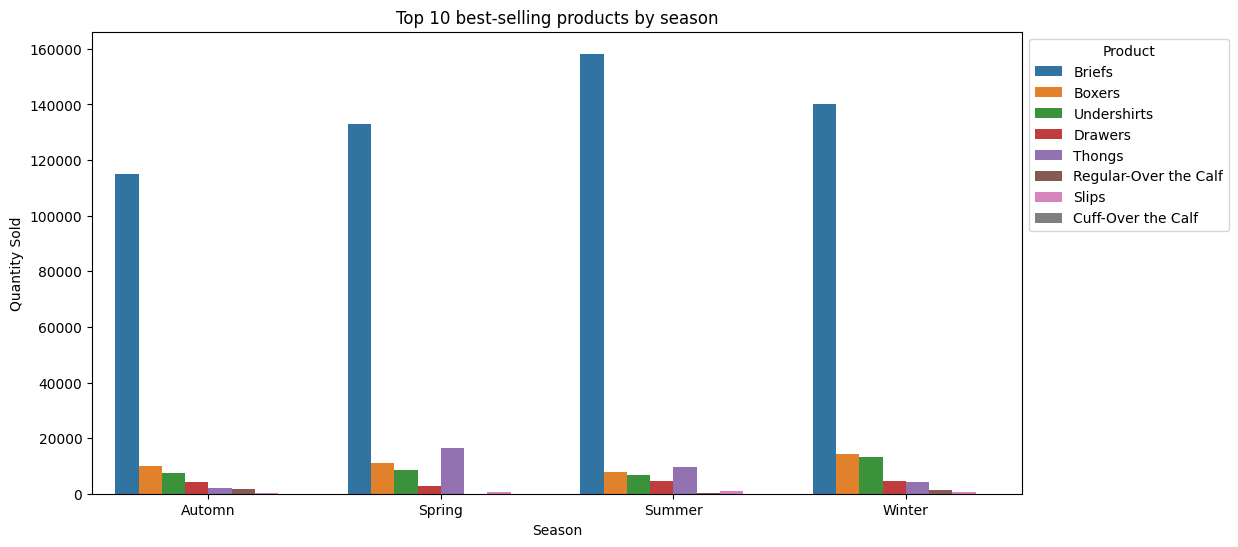

In [148]:
sold_tendecies_season(df_ventas_productos, 'Category', 10, 10)

Deducimos que: 
- *Briefs*: es el producto más vendido y la demanda aumenta significativamente en verano
- En verano disminuyen la demanda de todas las categorías menos *Briefs*
- La demanda de *Boxers* y *Undershirts* actúa igual en todas las estaciones y siempre suele estar *Boxers* por encima de *Undershirts*
- La demanda de *Regular-Over the Calf* sólo es significativa en invierno y un poco en verano, siendo inexistente en primavera.
- La demanda de *Thongs* cae en picado en invierno, siendo en primavera donde hay más demanda

In [149]:
df_ventas_productos.columns

Index(['OrderID', 'CustomerID', 'EmployeeID', 'ShippingMethodID', 'OrderDate',
       'ShipDate', 'FreightCharge', 'DeliveryTime', 'OrderYear', 'OrderMonth',
       'OrderWeekday', 'OrderDetailID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType', 'Season'],
      dtype='object')

      Season ProductType  QuantitySold
427   Automn       ERK61          8502
593   Automn         K46          5267
620   Automn       K4673          4455
634   Automn        K46S          4042
638   Automn        K46T          3868
...      ...         ...           ...
4193  Winter     TB4649S             1
4227  Winter      TEEB81             1
4243  Winter       TIB15             1
4258  Winter        TO32             1
4259  Winter       TO32S             0

[4313 rows x 3 columns]
      Season ProductType  QuantitySold  Rank
427   Automn       ERK61          8502   1.0
593   Automn         K46          5267   2.0
620   Automn       K4673          4455   3.0
634   Automn        K46S          4042   4.0
638   Automn        K46T          3868   5.0
537   Automn         K29          3472   6.0
519   Automn         K21          3367   7.0
306   Automn       BX34A          3043   8.0
552   Automn         K32          2487   9.0
553   Automn        K32E          2486  10.0
1543  Spring

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2937939110.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sales_graph = season_sales.groupby("Season").apply(lambda x: x.nlargest(top_figure, "QuantitySold")).reset_index(drop=True)


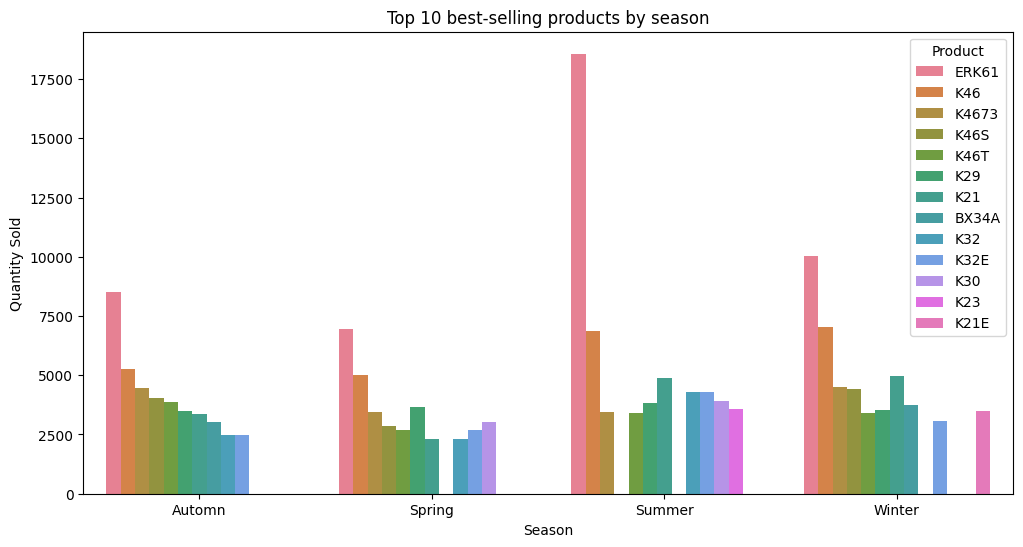

In [150]:
sold_tendecies_season(df_ventas_productos, 'ProductType')

   Season     PackSize  QuantitySold
0  Automn        Dozen        128736
1  Automn  Single Unit         11949
2  Spring        Dozen        157078
3  Spring  Single Unit         15377
4  Summer        Dozen        176823
5  Summer  Single Unit         11143
6  Winter        Dozen        157311
7  Winter  Single Unit         20795
   Season     PackSize  QuantitySold  Rank
0  Automn        Dozen        128736   1.0
1  Automn  Single Unit         11949   2.0
2  Spring        Dozen        157078   1.0
3  Spring  Single Unit         15377   2.0
4  Summer        Dozen        176823   1.0
5  Summer  Single Unit         11143   2.0
6  Winter        Dozen        157311   1.0
7  Winter  Single Unit         20795   2.0


C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2937939110.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sales_graph = season_sales.groupby("Season").apply(lambda x: x.nlargest(top_figure, "QuantitySold")).reset_index(drop=True)


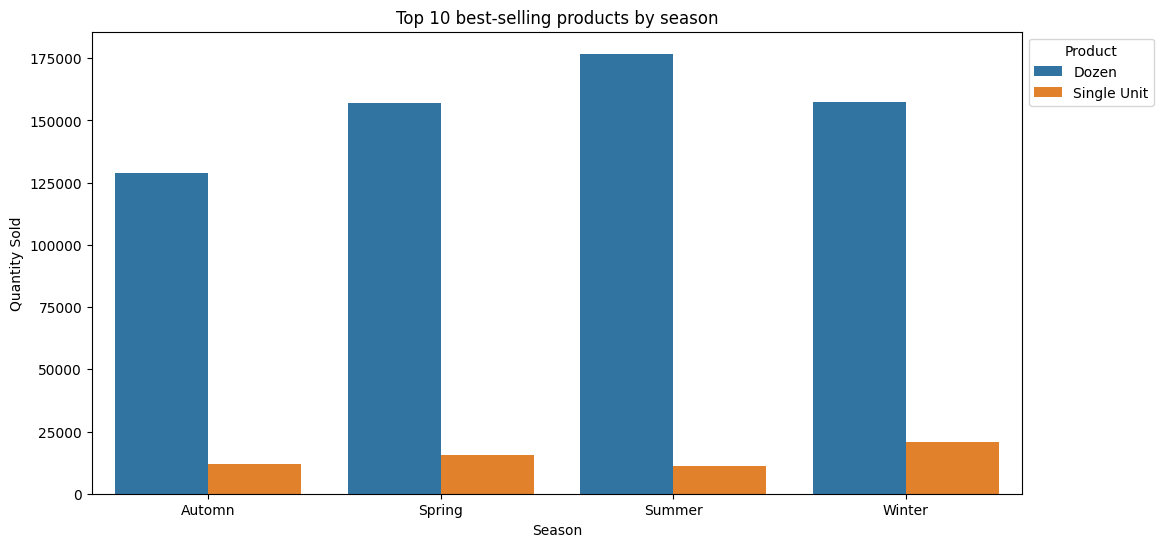

In [151]:
sold_tendecies_season(df_ventas_productos, 'PackSize')

    Season  Size  QuantitySold
13  Automn     M         31465
11  Automn     L         28289
16  Automn    XL         26257
18  Automn   XXL         17898
14  Automn     S         15851
..     ...   ...           ...
66  Winter   S-M           183
63  Winter  L-XL           168
60  Winter     7           138
57  Winter     5            97
52  Winter    13            30

[70 rows x 3 columns]
    Season Size  QuantitySold  Rank
13  Automn    M         31465   1.0
11  Automn    L         28289   2.0
16  Automn   XL         26257   3.0
18  Automn  XXL         17898   4.0
14  Automn    S         15851   5.0
3   Automn  3XL          9039   6.0
17  Automn   XS          4329   7.0
5   Automn  4XL          4202   8.0
7   Automn  5XL           893   9.0
8   Automn  6XL           538  10.0
27  Spring    M         40212   1.0
25  Spring    L         33555   2.0
30  Spring   XL         32457   3.0
28  Spring    S         27084   4.0
32  Spring  XXL         17235   5.0
20  Spring  3XL         10679

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2937939110.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sales_graph = season_sales.groupby("Season").apply(lambda x: x.nlargest(top_figure, "QuantitySold")).reset_index(drop=True)


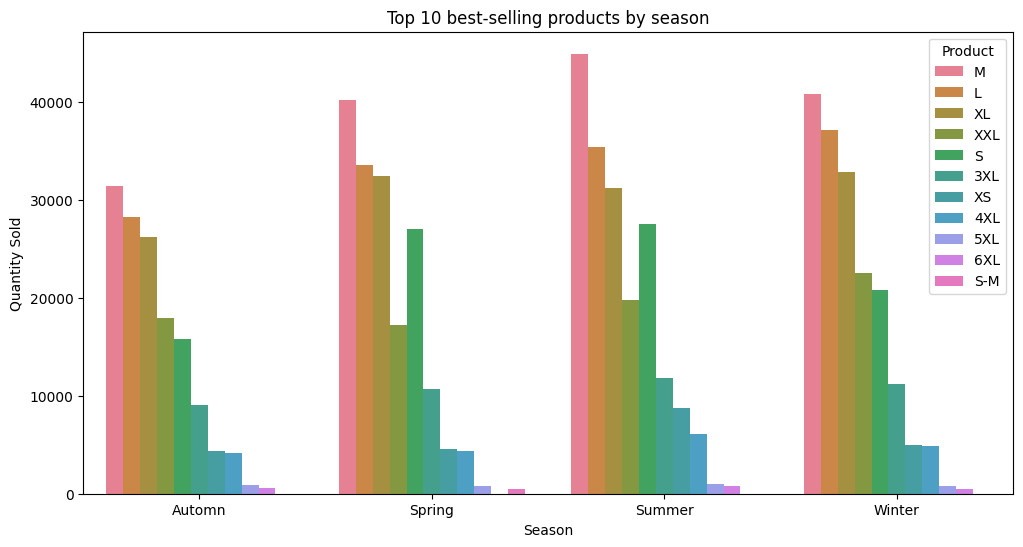

In [152]:
sold_tendecies_season(df_ventas_productos, 'Size')

    Season               Gender  QuantitySold
8   Automn      Women's Panties         98265
5   Automn         Men's Briefs         17015
3   Automn       Girls' Panties         11883
0   Automn         Boys' Briefs          4391
7   Automn    Men's Undershirts          4264
10  Automn  Women's Undershirts          1953
2   Automn     Children's Socks          1177
4   Automn   Girls' Undershirts           926
1   Automn    Boys' Undershirts           282
6   Automn          Men's Socks           275
9   Automn        Women's Socks           254
19  Spring      Women's Panties        129054
16  Spring         Men's Briefs         17622
14  Spring       Girls' Panties         13198
20  Spring  Women's Undershirts          4650
11  Spring         Boys' Briefs          4039
18  Spring    Men's Undershirts          2752
15  Spring   Girls' Undershirts           932
12  Spring    Boys' Undershirts           207
13  Spring     Children's Socks             1
17  Spring          Men's Socks   

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\2937939110.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_sales_graph = season_sales.groupby("Season").apply(lambda x: x.nlargest(top_figure, "QuantitySold")).reset_index(drop=True)


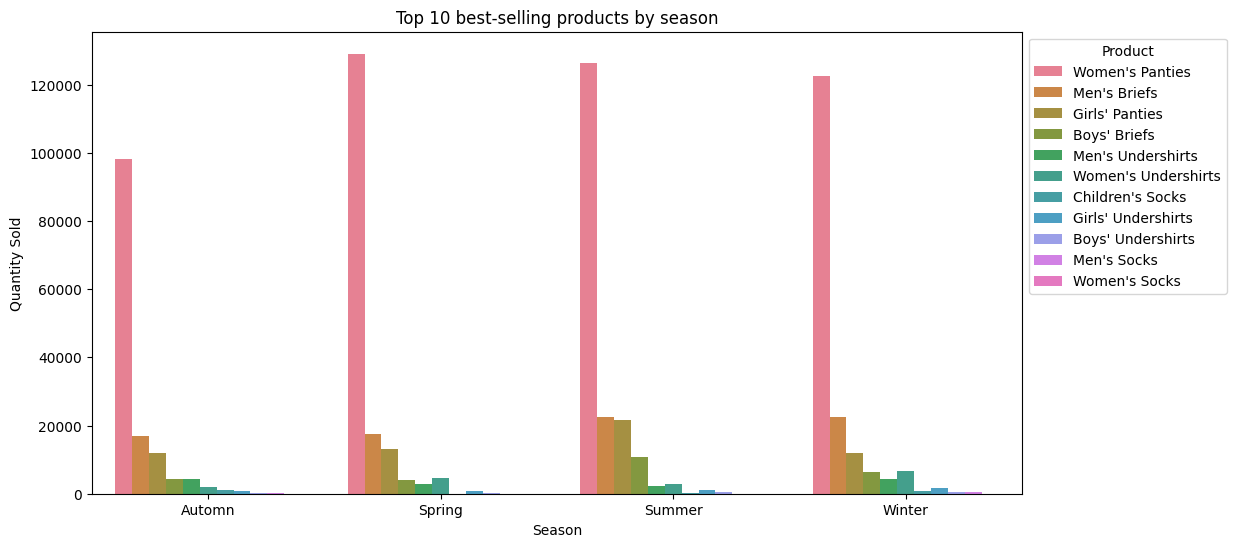

In [153]:
sold_tendecies_season(df_ventas_productos, 'Gender')

## **Análisis de inventario**

- Stock en producción
- Tasas de productos faltantes


In [154]:
df_inventory

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing
1148,2119,1213,25,0.0,2003-10-15,5.8,2.0,2.0,0.0
1151,2370,330,27,0.0,2003-09-16,6.3,80.0,80.0,0.0
1152,2371,117,27,0.0,2003-09-16,6.7,80.0,80.0,0.0
1153,2372,769,27,0.0,2003-09-16,7.3,60.0,60.0,0.0
1154,2373,894,27,0.0,2003-09-16,7.9,80.0,80.0,0.0
...,...,...,...,...,...,...,...,...,...
20946,41219,4419,315,0.0,2006-04-05,1.3,10.0,10.0,0.0
20947,41220,4420,315,0.0,2006-04-05,1.2,10.0,10.0,0.0
20948,41221,4421,315,0.0,2006-04-05,1.4,10.0,10.0,0.0
20949,41222,4261,315,0.0,2006-04-05,6.0,30.0,30.0,0.0


In [155]:
df_inventory_products  = pd.merge(df_inventory, df_products, on='ProductID')
df_inventory_products

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,ProductName,...,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
0,2119,1213,25,0.0,2003-10-15,5.8,2.0,2.0,0.0,3-168,...,Undershirts,Girls' Undershirts,Underwear,594,M,Dozen,Out of Production,2003-10-15,5.8,168
1,2370,330,27,0.0,2003-09-16,6.3,80.0,80.0,0.0,M-191,...,Undershirts,Men's Undershirts,Underwear,1005,M,Dozen,In Production,2003-08-06,6.7,191
2,2371,117,27,0.0,2003-09-16,6.7,80.0,80.0,0.0,L-191,...,Undershirts,Men's Undershirts,Underwear,1165,L,Dozen,In Production,2003-07-10,7.2,191
3,2372,769,27,0.0,2003-09-16,7.3,60.0,60.0,0.0,XL-191,...,Undershirts,Men's Undershirts,Underwear,1330,XL,Dozen,In Production,2003-07-10,7.7,191
4,2373,894,27,0.0,2003-09-16,7.9,80.0,80.0,0.0,XXL-191,...,Undershirts,Men's Undershirts,Underwear,1410,XXL,Dozen,In Production,2003-07-10,8.2,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,41219,4419,315,0.0,2006-04-05,1.3,10.0,10.0,0.0,L-BX46CK,...,Boxers,Men's Briefs,Underwear,90,L,Single Unit,In Production,2006-04-04,1.3,BX46CK
17524,41220,4420,315,0.0,2006-04-05,1.2,10.0,10.0,0.0,M-BX46CK,...,Boxers,Men's Briefs,Underwear,85,M,Single Unit,In Production,2006-04-04,1.2,BX46CK
17525,41221,4421,315,0.0,2006-04-05,1.4,10.0,10.0,0.0,XL-BX46CK,...,Boxers,Men's Briefs,Underwear,100,XL,Single Unit,In Production,2006-04-04,1.4,BX46CK
17526,41222,4261,315,0.0,2006-04-05,6.0,30.0,30.0,0.0,M-BS46CB,...,Briefs,Women's Panties,Underwear,325,M,Dozen,In Production,2006-03-15,6.0,BS46CB


**Best-selling products**

In [156]:
best_selling_prod = df_inventory_products.groupby('ProductID')['QuantityOrdered'].sum().reset_index()
best_selling_prod = best_selling_prod.sort_values(by='QuantityOrdered', ascending=False)
best_selling_prod.head(100)

,ProductID,QuantityOrdered
314,427,6303.0
7,9,4920.0
142,183,4849.0
508,678,4676.0
675,856,4457.0
...,...,...
385,518,1073.0
787,985,1072.0
659,837,1064.0
54,60,1045.0


In [157]:
best_selling_prod_1000 = best_selling_prod[best_selling_prod['QuantityOrdered'] > 1000]
best_selling_prod_1000

,ProductID,QuantityOrdered
314,427,6303.0
7,9,4920.0
142,183,4849.0
508,678,4676.0
675,856,4457.0
...,...,...
14,17,1025.0
648,825,1015.0
588,761,1008.0
428,576,1008.0


In [158]:
prod_1000 = pd.merge(best_selling_prod_1000, df_products, on='ProductID')
prod_1000

,ProductID,QuantityOrdered,ProductName,ModelDescription,Category,Gender,ProductLine,Weight,Size,PackSize,Status,InventoryDate,PurchasePrice,ProductType
0,427,6303.0,M-ERK61,ERK,Briefs,Men's Briefs,Underwear,505,M,Dozen,In Production,2003-07-10,3.6,ERK61
1,9,4920.0,3-ERK61,ERK,Briefs,Boys' Briefs,Underwear,325,M,Dozen,In Production,2003-07-10,2.7,ERK61
2,183,4849.0,L-ERK61,ERK,Briefs,Men's Briefs,Underwear,575,L,Dozen,In Production,2003-07-10,3.9,ERK61
3,678,4676.0,S-ERK61,ERK,Briefs,Men's Briefs,Underwear,455,S,Dozen,In Production,2003-07-10,3.3,ERK61
4,856,4457.0,XL-K46,K,Briefs,Women's Panties,Underwear,575,XL,Dozen,In Production,2003-07-10,4.3,K46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,17,1025.0,3-K21,K,Briefs,Girls' Panties,Underwear,281,M,Dozen,In Production,2003-07-10,2.7,K21
103,825,1015.0,XL-K24E,K,Briefs,Women's Panties,Underwear,524,XL,Dozen,In Production,2003-08-06,3.9,K24E
104,761,1008.0,XL-171,AT,Undershirts,Men's Undershirts,Underwear,1160,XL,Dozen,In Production,2003-07-10,7.3,171
105,576,1008.0,M-S46,S,Briefs,Women's Panties,Underwear,330,M,Dozen,In Production,2003-08-06,3.9,S46


In [159]:
prod_1000.columns

Index(['ProductID', 'QuantityOrdered', 'ProductName', 'ModelDescription',
       'Category', 'Gender', 'ProductLine', 'Weight', 'Size', 'PackSize',
       'Status', 'InventoryDate', 'PurchasePrice', 'ProductType'],
      dtype='object')

Category
Briefs         93
Drawers         8
Boxers          5
Undershirts     1
Name: count, dtype: int64


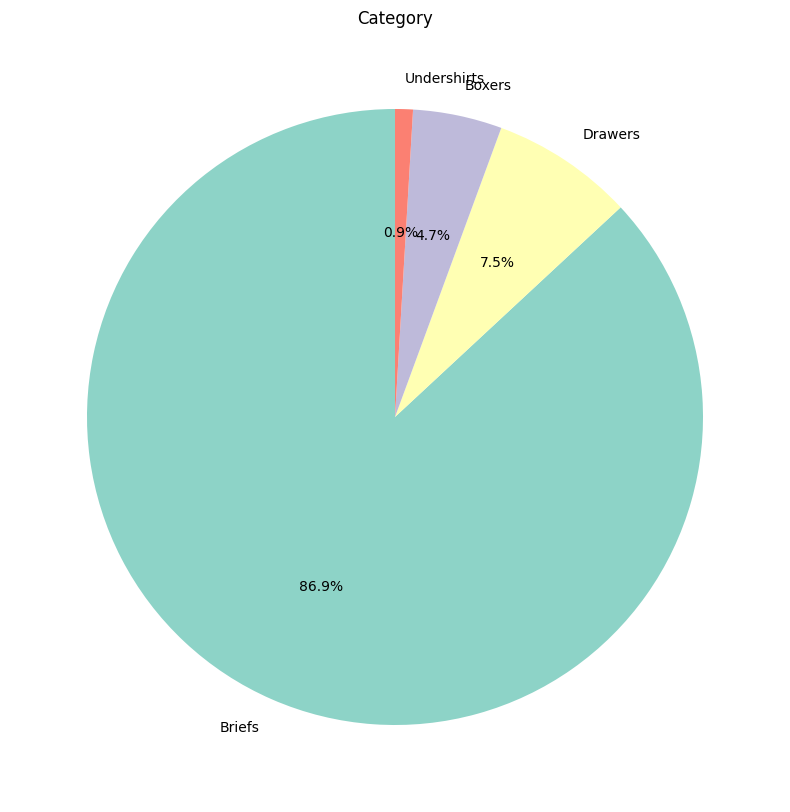

In [160]:
f.piechart(prod_1000, 'Category', 0.001)

Gender
Women's Panties      85
Men's Briefs         12
Girls' Panties        6
Boys' Briefs          3
Men's Undershirts     1
Name: count, dtype: int64


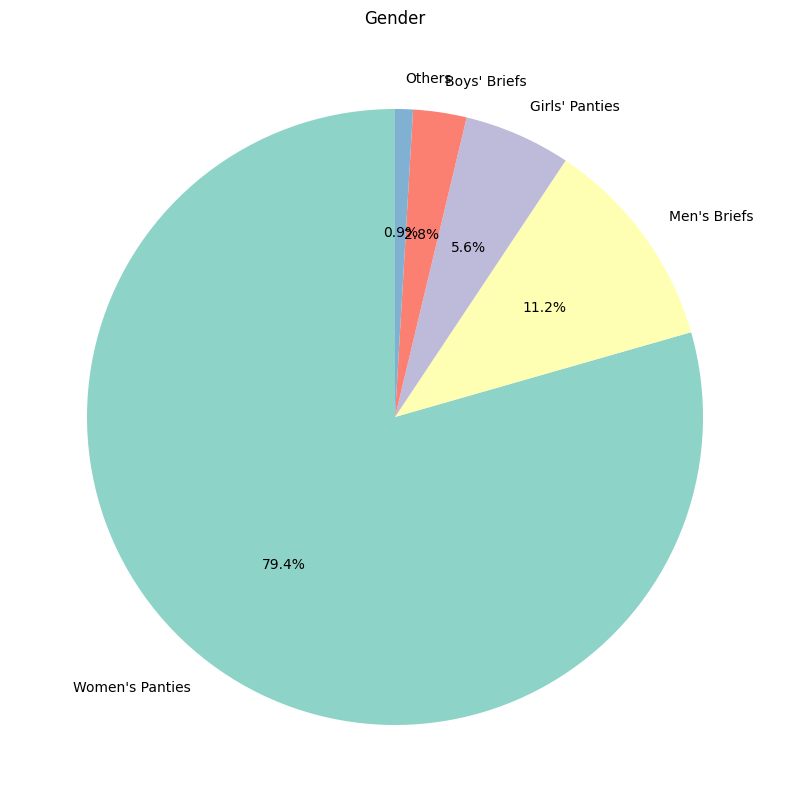

In [161]:
f.piechart(prod_1000, 'Gender', 0.01)

Size
L      23
XL     23
XXL    21
M      16
3XL    12
S       5
4XL     5
XS      2
Name: count, dtype: int64


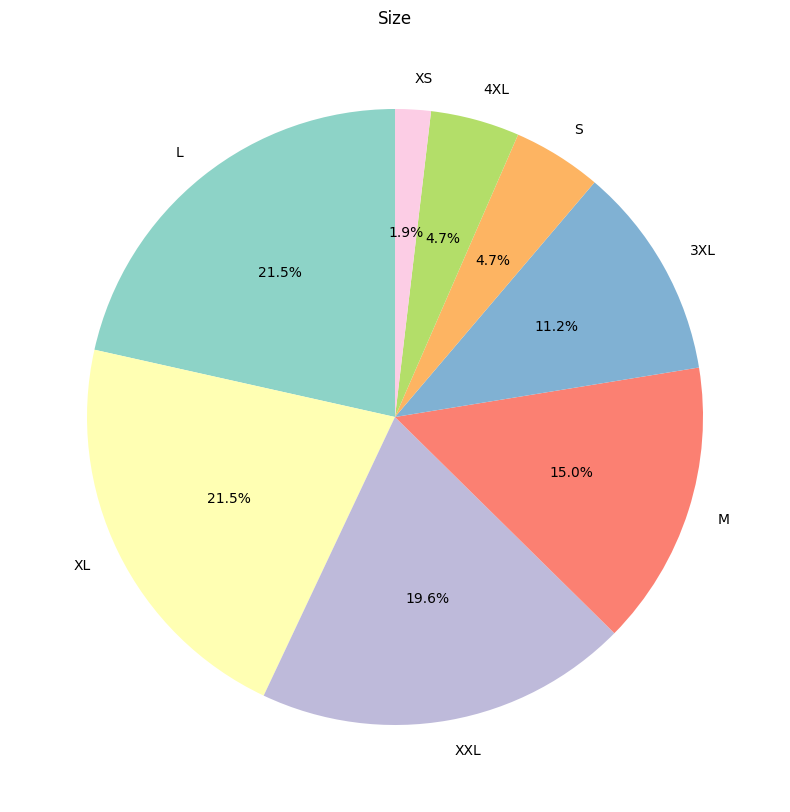

In [162]:
f.piechart(prod_1000, 'Size', 0.001)

PackSize
Dozen          102
Single Unit      5
Name: count, dtype: int64


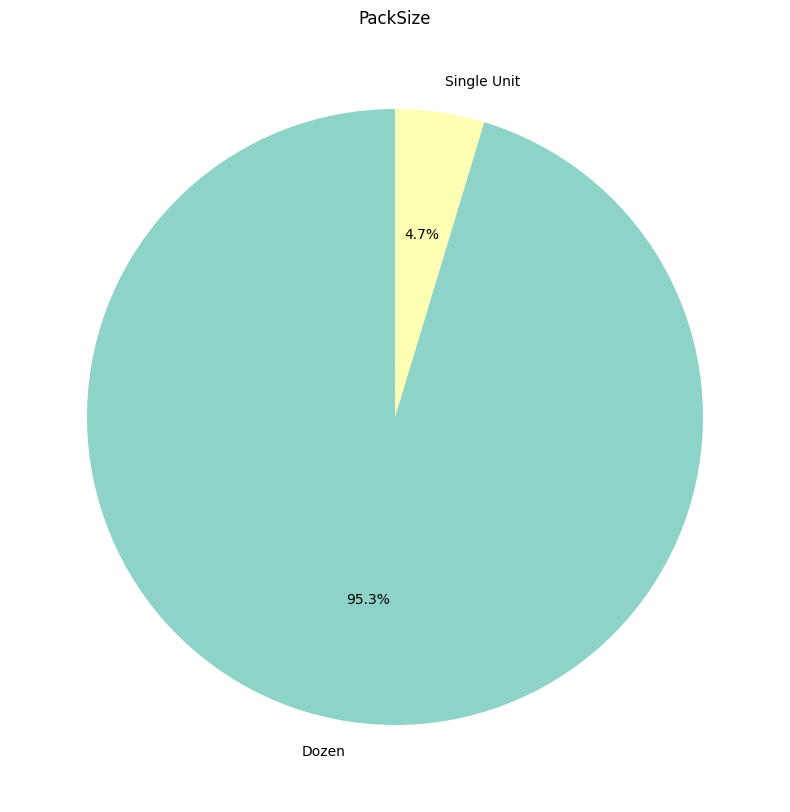

In [163]:
f.piechart(prod_1000, 'PackSize', 0.001)

Status
In Production        104
Out of Production      3
Name: count, dtype: int64


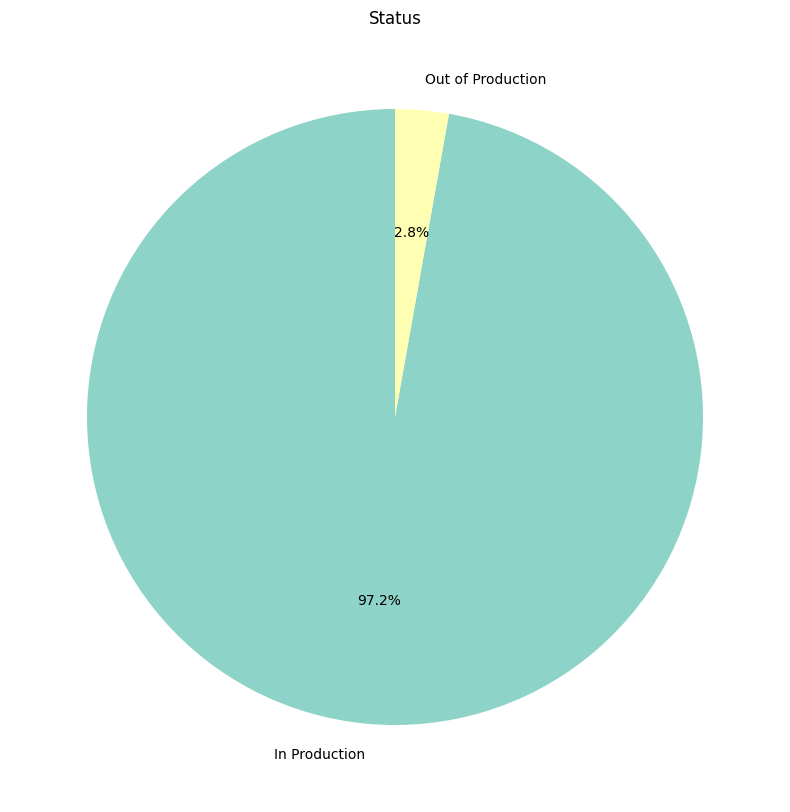

In [164]:
f.piechart(prod_1000, 'Status', 0.001)

ProductType
ERK61     8
K21       8
K46       6
K4673     5
K32       5
K29       5
K46S      5
K46T      5
K46E      5
K30       5
K32E      5
K21E      4
BX34A     3
K24       3
K24E      3
K23       3
S4673     3
G46       3
K31       2
K31E      2
ERK64     2
S46       2
BX61A     2
PCL31T    1
PCL32T    1
PCL29     1
PCL32     1
PCL31S    1
F56       1
PCL32E    1
PCL31     1
GB31E     1
K32S      1
K30N      1
PCL31E    1
171       1
Name: count, dtype: int64


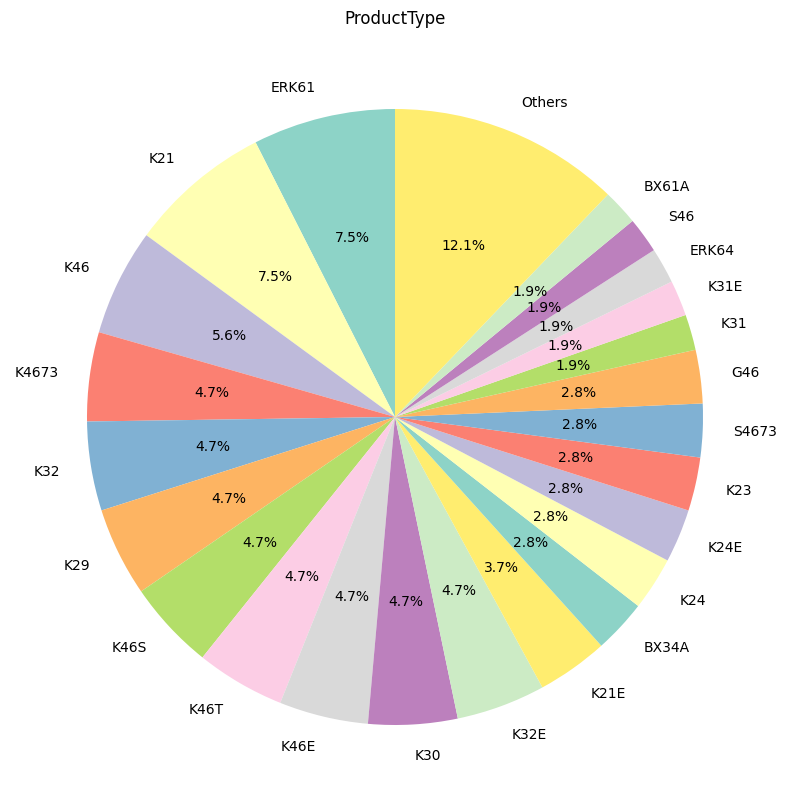

In [165]:
f.piechart(prod_1000, 'ProductType', 0.01)

**Tendencias a lo largo del tiempo**

In [166]:
df_inventory_products.dtypes

TransactionID          int64
ProductID              int64
PurchaseOrderID        int64
MissingID            float64
TransactionDate       object
UnitPurchasePrice    float64
QuantityOrdered      float64
QuantityReceived     float64
QuantityMissing      float64
ProductName           object
ModelDescription      object
Category              object
Gender                object
ProductLine           object
Weight                 int64
Size                  object
PackSize              object
Status                object
InventoryDate         object
PurchasePrice        float64
ProductType           object
dtype: object

In [167]:
#Transform data columns to date time

df_inventory_products['InventoryDate'] = pd.to_datetime(df_inventory_products['InventoryDate'])
df_inventory_products['TransactionDate'] = pd.to_datetime(df_inventory_products['TransactionDate'])

In [168]:
df_inventory_products.dtypes

TransactionID                 int64
ProductID                     int64
PurchaseOrderID               int64
MissingID                   float64
TransactionDate      datetime64[ns]
UnitPurchasePrice           float64
QuantityOrdered             float64
QuantityReceived            float64
QuantityMissing             float64
ProductName                  object
ModelDescription             object
Category                     object
Gender                       object
ProductLine                  object
Weight                        int64
Size                         object
PackSize                     object
Status                       object
InventoryDate        datetime64[ns]
PurchasePrice               float64
ProductType                  object
dtype: object

In [169]:
purchases_per_month = df_inventory_products.groupby(df_inventory_products['TransactionDate'].dt.to_period('M'))['QuantityOrdered'].sum()
purchases_per_month

TransactionDate
2003-09    23668.0
2003-10    11628.0
2003-11    19700.0
2003-12    12885.0
2004-01    12598.0
2004-02    28016.0
2004-03     6528.0
2004-04    36007.0
2004-05    11832.0
2004-06    34418.0
2004-07    18700.0
2004-08     7704.0
2004-09    25789.0
2004-10    25383.0
2004-11    58904.0
2004-12     1429.0
2005-01     1966.0
2005-02     9952.0
2005-03    16040.0
2005-04    51990.0
2005-05     9464.0
2005-06    22559.0
2005-07    10615.0
2005-08    44252.0
2005-09    26750.0
2005-10    11009.0
2005-11     4387.0
2005-12     6597.0
2006-01    18803.0
2006-02    17292.0
2006-03    58093.0
2006-04     2770.0
Freq: M, Name: QuantityOrdered, dtype: float64

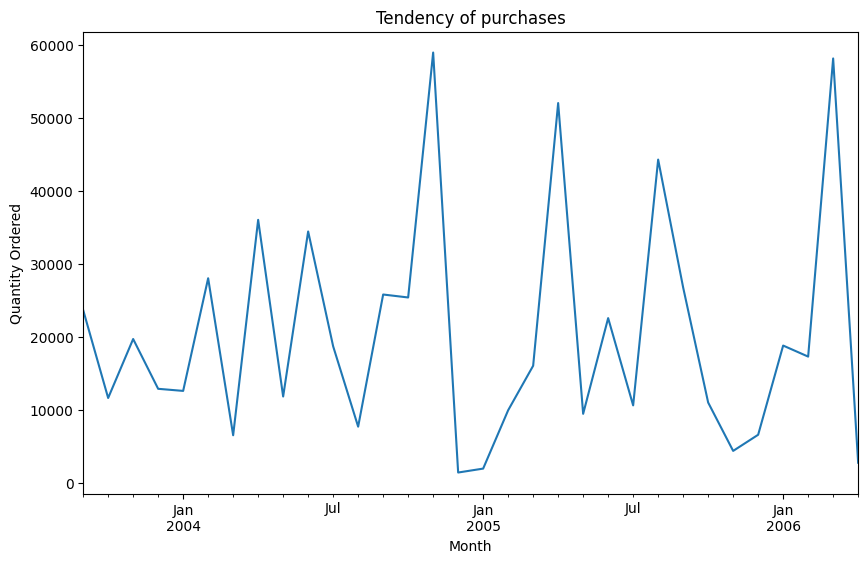

In [172]:
plt.figure(figsize=(10,6))
purchases_per_month.plot(kind='line')
plt.title('Tendency of purchases')
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.show()

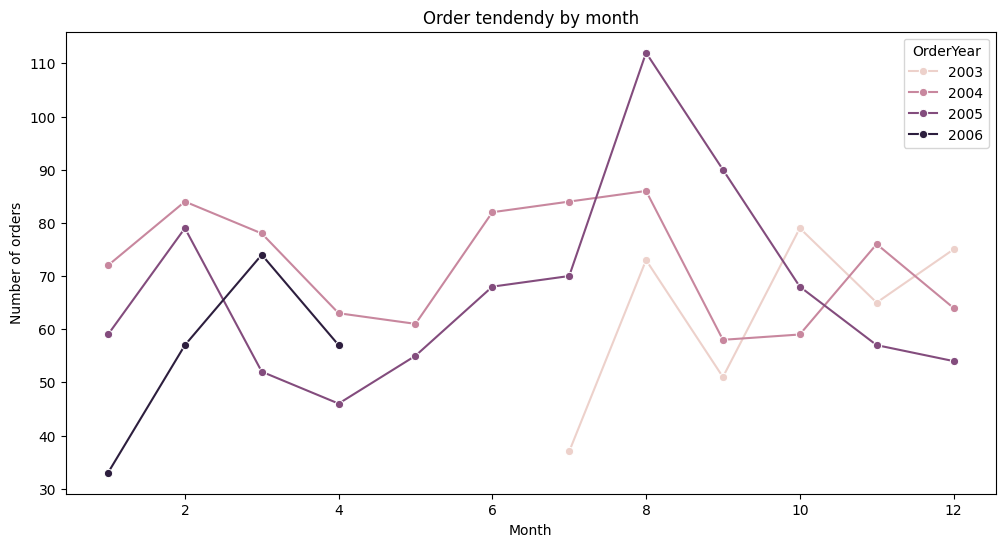

In [173]:
monthly_orders = df_orders.groupby(["OrderYear", "OrderMonth"])["OrderID"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x="OrderMonth", y="OrderID", hue="OrderYear", marker="o")
plt.title("Order tendendy by month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.show()

**Desajustes entre cantidad pedida y recibida**

In [174]:
df_inventory.isna().sum()

TransactionID        0
ProductID            0
PurchaseOrderID      0
MissingID            0
TransactionDate      0
UnitPurchasePrice    0
QuantityOrdered      0
QuantityReceived     0
QuantityMissing      0
dtype: int64

In [176]:
df_inventory['DiferenceQuantity'] = df_inventory['QuantityOrdered'] - df_inventory['QuantityReceived']
df_inventory

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,DiferenceQuantity
1148,2119,1213,25,0.0,2003-10-15,5.8,2.0,2.0,0.0,0.0
1151,2370,330,27,0.0,2003-09-16,6.3,80.0,80.0,0.0,0.0
1152,2371,117,27,0.0,2003-09-16,6.7,80.0,80.0,0.0,0.0
1153,2372,769,27,0.0,2003-09-16,7.3,60.0,60.0,0.0,0.0
1154,2373,894,27,0.0,2003-09-16,7.9,80.0,80.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20946,41219,4419,315,0.0,2006-04-05,1.3,10.0,10.0,0.0,0.0
20947,41220,4420,315,0.0,2006-04-05,1.2,10.0,10.0,0.0,0.0
20948,41221,4421,315,0.0,2006-04-05,1.4,10.0,10.0,0.0,0.0
20949,41222,4261,315,0.0,2006-04-05,6.0,30.0,30.0,0.0,0.0


In [177]:
df_inventory[df_inventory['DiferenceQuantity'] != 0].shape # son solo 7

(7, 10)

In [178]:
df_inventory[df_inventory['DiferenceQuantity'] != 0]

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,DiferenceQuantity
18977,39242,3758,300,0.0,2006-02-13,6.3,10.0,20.0,0.0,-10.0
18992,39257,3711,301,0.0,2006-02-13,7.0,10.0,20.0,0.0,-10.0
20005,40276,3749,308,0.0,2006-03-16,7.0,20.0,2.0,0.0,18.0
20283,40554,4311,309,0.0,2006-03-17,5.9,30.0,100.0,0.0,-70.0
20284,40555,4312,309,0.0,2006-03-17,6.2,30.0,100.0,0.0,-70.0
20285,40556,4314,309,0.0,2006-03-17,6.2,30.0,100.0,0.0,-70.0
20866,41139,4381,314,0.0,2006-03-22,4.2,205.0,400.0,0.0,-195.0


podemos ver que son mas o menos en la misma fecha, seria por un problema aislado

In [179]:
purchaseID = df_inventory[df_inventory['DiferenceQuantity'] != 0]['PurchaseOrderID'].to_list()
purchaseID

[300, 301, 308, 309, 309, 309, 314]

In [180]:
df_purchase_orders[df_purchase_orders['PurchaseOrderID'].isin(purchaseID)]

,PurchaseOrderID,EmployeeID,OrderDate,ShippingMethod,SupplierName
212,300,15,2006-02-13,Door to Door Service,S1
213,301,15,2006-02-13,Door to Door Service,S1
219,308,15,2006-03-16,Door to Door Service,S1
220,309,15,2006-03-17,Door to Door Service,S1
225,314,15,2006-03-22,Door to Door Service,S1


Todos corresponden con el mismo proveedor, el mismo empleado y el mismo método de compra --> el problema es ese

**Precio de compra de los productos**

In [181]:
df_inventory.isna().sum()

TransactionID        0
ProductID            0
PurchaseOrderID      0
MissingID            0
TransactionDate      0
UnitPurchasePrice    0
QuantityOrdered      0
QuantityReceived     0
QuantityMissing      0
DiferenceQuantity    0
dtype: int64

In [182]:
df_inventory_no_null1 = df_inventory.dropna(subset=['UnitPurchasePrice'])
df_inventory_no_null1

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,DiferenceQuantity
1148,2119,1213,25,0.0,2003-10-15,5.8,2.0,2.0,0.0,0.0
1151,2370,330,27,0.0,2003-09-16,6.3,80.0,80.0,0.0,0.0
1152,2371,117,27,0.0,2003-09-16,6.7,80.0,80.0,0.0,0.0
1153,2372,769,27,0.0,2003-09-16,7.3,60.0,60.0,0.0,0.0
1154,2373,894,27,0.0,2003-09-16,7.9,80.0,80.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20946,41219,4419,315,0.0,2006-04-05,1.3,10.0,10.0,0.0,0.0
20947,41220,4420,315,0.0,2006-04-05,1.2,10.0,10.0,0.0,0.0
20948,41221,4421,315,0.0,2006-04-05,1.4,10.0,10.0,0.0,0.0
20949,41222,4261,315,0.0,2006-04-05,6.0,30.0,30.0,0.0,0.0


In [183]:
df_inventory_no_null1['TotalPurchasePrice'] = df_inventory_no_null1['UnitPurchasePrice'] * df_inventory_no_null1['QuantityOrdered']
df_inventory_no_null1

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,DiferenceQuantity,TotalPurchasePrice
1148,2119,1213,25,0.0,2003-10-15,5.8,2.0,2.0,0.0,0.0,11.6
1151,2370,330,27,0.0,2003-09-16,6.3,80.0,80.0,0.0,0.0,504.0
1152,2371,117,27,0.0,2003-09-16,6.7,80.0,80.0,0.0,0.0,536.0
1153,2372,769,27,0.0,2003-09-16,7.3,60.0,60.0,0.0,0.0,438.0
1154,2373,894,27,0.0,2003-09-16,7.9,80.0,80.0,0.0,0.0,632.0
...,...,...,...,...,...,...,...,...,...,...,...
20946,41219,4419,315,0.0,2006-04-05,1.3,10.0,10.0,0.0,0.0,13.0
20947,41220,4420,315,0.0,2006-04-05,1.2,10.0,10.0,0.0,0.0,12.0
20948,41221,4421,315,0.0,2006-04-05,1.4,10.0,10.0,0.0,0.0,14.0
20949,41222,4261,315,0.0,2006-04-05,6.0,30.0,30.0,0.0,0.0,180.0


In [184]:
price_product = df_inventory_no_null1.groupby('ProductID').agg({
    'TotalPurchasePrice': 'sum', 'QuantityOrdered':'sum'
}).reset_index()

price_product.sort_values(by='TotalPurchasePrice', ascending=False).head(70)

,ProductID,TotalPurchasePrice,QuantityOrdered
324,427,21279.85,6303.0
152,183,18268.85,4849.0
751,932,17893.80,4166.0
685,856,17758.00,4457.0
801,989,16449.70,3501.0
...,...,...,...
157,190,6041.50,1255.0
787,974,6031.50,1405.0
603,766,6022.00,800.0
792,980,6010.75,1513.0


**Evolución del precio de compra**

In [185]:
df_inventory_no_null1['TransactionDate'] = pd.to_datetime(df_inventory_no_null1['TransactionDate'])

In [186]:
df_inventory_no_null1.dtypes

TransactionID                  int64
ProductID                      int64
PurchaseOrderID                int64
MissingID                    float64
TransactionDate       datetime64[ns]
UnitPurchasePrice            float64
QuantityOrdered              float64
QuantityReceived             float64
QuantityMissing              float64
DiferenceQuantity            float64
TotalPurchasePrice           float64
dtype: object

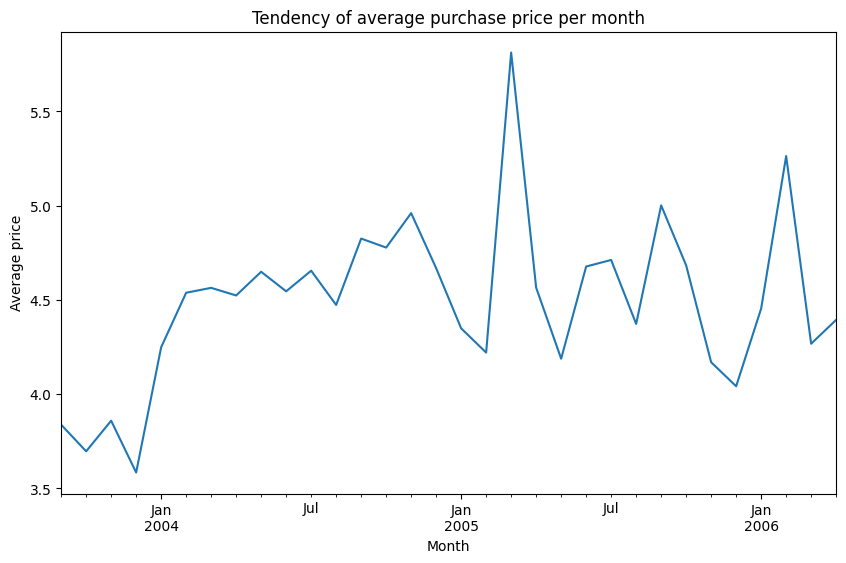

In [187]:
average_price = df_inventory_no_null1.groupby(df_inventory_no_null1['TransactionDate'].dt.to_period('M'))['UnitPurchasePrice'].mean()

average_price.plot(kind='line', figsize=(10,6))
plt.title('Tendency of average purchase price per month')
plt.xlabel('Month')
plt.ylabel('Average price')
plt.show()

**Relación entre los precios y la cantidad comprada**

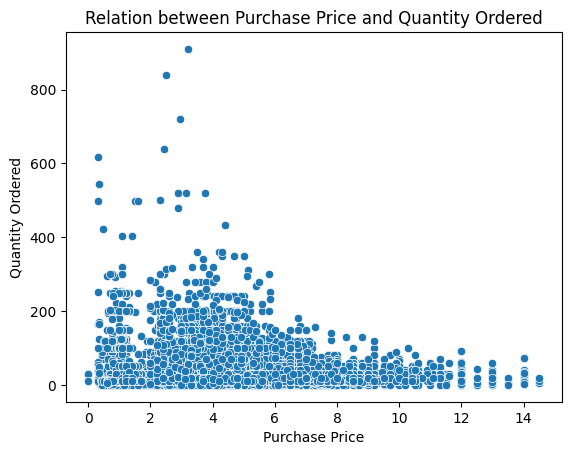

In [188]:
sns.scatterplot(x='UnitPurchasePrice', y='QuantityOrdered', data = df_inventory_no_null1)
plt.title('Relation between Purchase Price and Quantity Ordered')
plt.xlabel('Purchase Price')
plt.ylabel('Quantity Ordered')
plt.show()

In [189]:
df_inventory_no_null1['UnitPurchasePrice'].corr(df_inventory_no_null1['QuantityOrdered']) #es baja pero negativa, mientras mas cantidad pidas mas bajo sera el precio

np.float64(-0.14265718643414388)

**Análisis de transacciones por mes/día**

In [190]:
df_inventory.isna().sum()

TransactionID        0
ProductID            0
PurchaseOrderID      0
MissingID            0
TransactionDate      0
UnitPurchasePrice    0
QuantityOrdered      0
QuantityReceived     0
QuantityMissing      0
DiferenceQuantity    0
dtype: int64

In [192]:
df_inventory_date['TransactionDate'] = pd.to_datetime(df_inventory_date['TransactionDate'])

In [193]:
df_inventory_date.dtypes

TransactionID                 int64
ProductID                     int64
PurchaseOrderID               int64
MissingID                   float64
TransactionDate      datetime64[ns]
UnitPurchasePrice           float64
QuantityOrdered             float64
QuantityReceived            float64
QuantityMissing             float64
DiferenceQuantity           float64
dtype: object

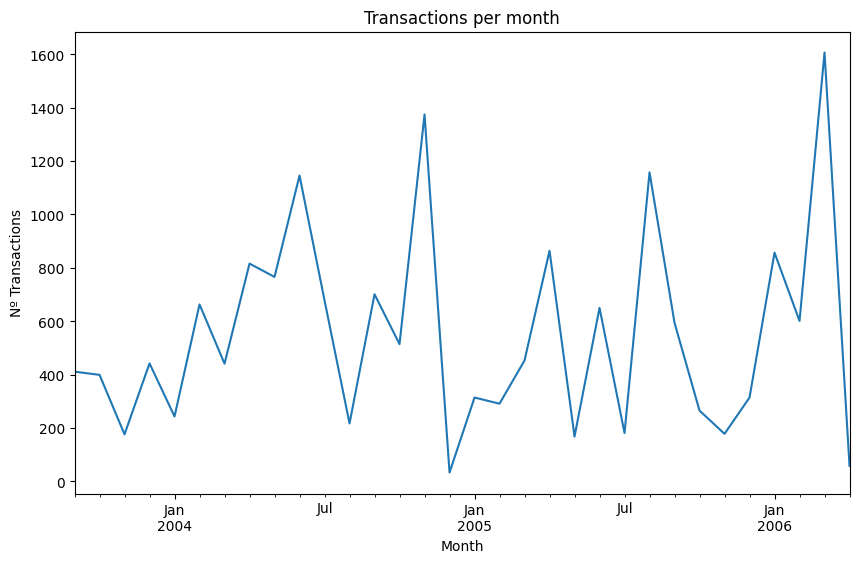

In [194]:
transactions_month = df_inventory_date.groupby(df_inventory_date['TransactionDate'].dt.to_period('M'))['TransactionID'].count()

transactions_month.plot(kind='line', figsize=(10,6))
plt.title('Transactions per month')
plt.xlabel('Month')
plt.ylabel('Nº Transactions')
plt.show()

Cuando más caros están los precios, hay una caida del nº de transacciones

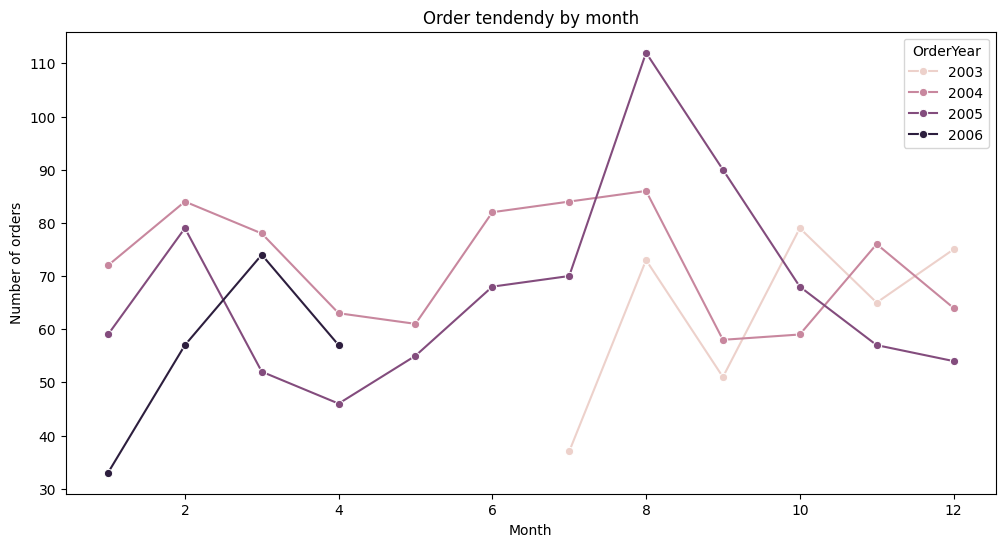

In [195]:
monthly_orders = df_orders.groupby(["OrderYear", "OrderMonth"])["OrderID"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_orders, x="OrderMonth", y="OrderID", hue="OrderYear", marker="o")
plt.title("Order tendendy by month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.show()

**Análisis de productos faltantes**

In [ ]:
df_inventory['QuantityMissing'].unique() #de todo hay

array([0.])

### **Análisis proveedores**

In [202]:
df_inventory_suppliers = pd.merge(df_inventory, df_purchase_orders, on ='PurchaseOrderID')
df_inventory_suppliers

,TransactionID,ProductID,PurchaseOrderID,MissingID,TransactionDate,UnitPurchasePrice,QuantityOrdered,QuantityReceived,QuantityMissing,DiferenceQuantity,EmployeeID,OrderDate,ShippingMethod,SupplierName
0,2119,1213,25,0.0,2003-10-15,5.8,2.0,2.0,0.0,0.0,1,2003-10-15,Container,S1
1,2370,330,27,0.0,2003-09-16,6.3,80.0,80.0,0.0,0.0,1,2003-09-16,Container,S1
2,2371,117,27,0.0,2003-09-16,6.7,80.0,80.0,0.0,0.0,1,2003-09-16,Container,S1
3,2372,769,27,0.0,2003-09-16,7.3,60.0,60.0,0.0,0.0,1,2003-09-16,Container,S1
4,2373,894,27,0.0,2003-09-16,7.9,80.0,80.0,0.0,0.0,1,2003-09-16,Container,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17351,41219,4419,315,0.0,2006-04-05,1.3,10.0,10.0,0.0,0.0,1,2006-04-05,Door to Door Service,S1
17352,41220,4420,315,0.0,2006-04-05,1.2,10.0,10.0,0.0,0.0,1,2006-04-05,Door to Door Service,S1
17353,41221,4421,315,0.0,2006-04-05,1.4,10.0,10.0,0.0,0.0,1,2006-04-05,Door to Door Service,S1
17354,41222,4261,315,0.0,2006-04-05,6.0,30.0,30.0,0.0,0.0,1,2006-04-05,Door to Door Service,S1


In [203]:
df_inventory_suppliers.columns

Index(['TransactionID', 'ProductID', 'PurchaseOrderID', 'MissingID',
       'TransactionDate', 'UnitPurchasePrice', 'QuantityOrdered',
       'QuantityReceived', 'QuantityMissing', 'DiferenceQuantity',
       'EmployeeID', 'OrderDate', 'ShippingMethod', 'SupplierName'],
      dtype='object')

**Análisis de compras por proveedor**

In [204]:
purchase_supplier = df_inventory_suppliers.groupby('SupplierName')['QuantityOrdered'].sum()
purchase_supplier

SupplierName
S1    642591.0
S2      6774.0
Name: QuantityOrdered, dtype: float64

Text(0.5, 1.0, 'Quantity ordered by supplier')

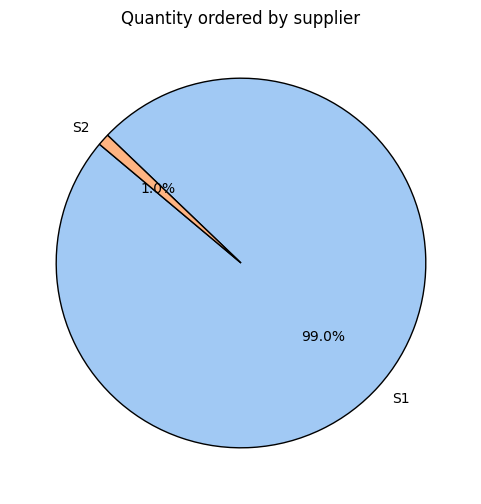

In [205]:
colors = sns.color_palette("pastel")
plt.figure(figsize=(6,6))
plt.pie(purchase_supplier, labels=purchase_supplier.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Quantity ordered by supplier')

In [206]:
df_inventory_suppliers['PurchaseValue'] = df_inventory_suppliers['UnitPurchasePrice']*df_inventory_suppliers['QuantityOrdered']

In [207]:
total_value_purchase = df_inventory_suppliers.groupby('SupplierName')['PurchaseValue'].sum()
total_value_purchase

SupplierName
S1    2713208.44
S2      32822.70
Name: PurchaseValue, dtype: float64

In [211]:
supplier1 = df_inventory_suppliers[df_inventory_suppliers['SupplierName'] == 'S1']
supplier2 = df_inventory_suppliers[df_inventory_suppliers['SupplierName'] == 'S2']

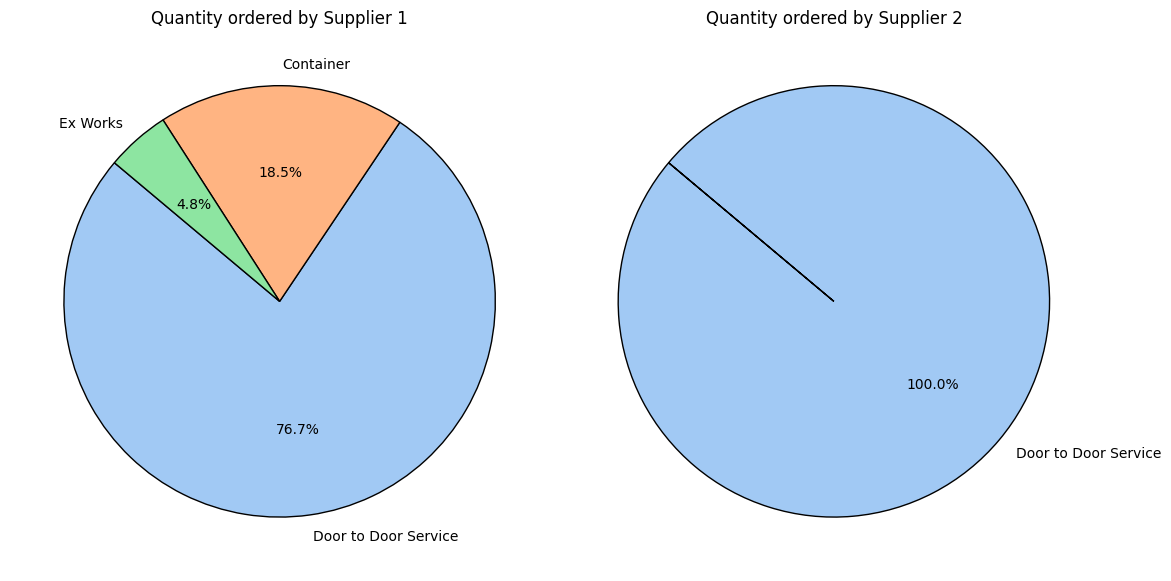

In [216]:
methods1 = supplier1['ShippingMethod'].value_counts()
methods2 = supplier2['ShippingMethod'].value_counts()

colors = sns.color_palette("pastel")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

axes[0].pie(methods1, labels=methods1.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Quantity ordered by Supplier 1')

axes[1].pie(methods2, labels=methods2.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Quantity ordered by Supplier 2')
plt.tight_layout()
plt.show()


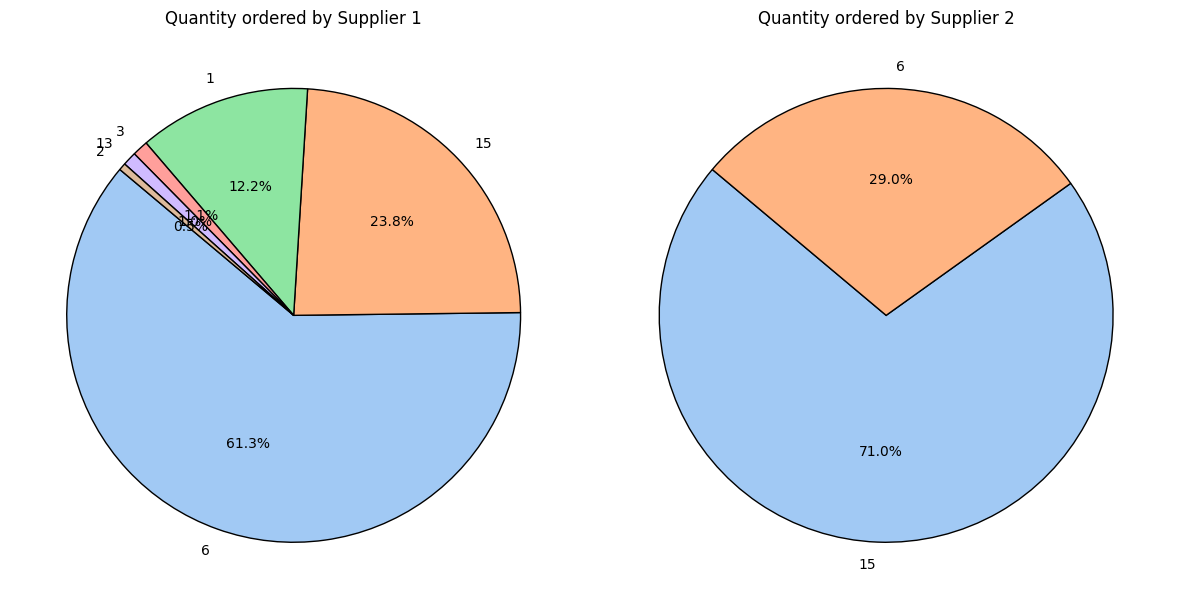

In [217]:
methods1 = supplier1['EmployeeID'].value_counts()
methods2 = supplier2['EmployeeID'].value_counts()

colors = sns.color_palette("pastel")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

axes[0].pie(methods1, labels=methods1.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Quantity ordered by Supplier 1')

axes[1].pie(methods2, labels=methods2.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Quantity ordered by Supplier 2')
plt.tight_layout()
plt.show()

In [218]:
df_inventory_suppliers.dtypes

TransactionID          int64
ProductID              int64
PurchaseOrderID        int64
MissingID            float64
TransactionDate       object
UnitPurchasePrice    float64
QuantityOrdered      float64
QuantityReceived     float64
QuantityMissing      float64
DiferenceQuantity    float64
EmployeeID             int64
OrderDate             object
ShippingMethod        object
SupplierName          object
PurchaseValue        float64
dtype: object

In [219]:
df_inventory_suppliers['TransactionDate'] = pd.to_datetime(df_inventory_suppliers['TransactionDate'])

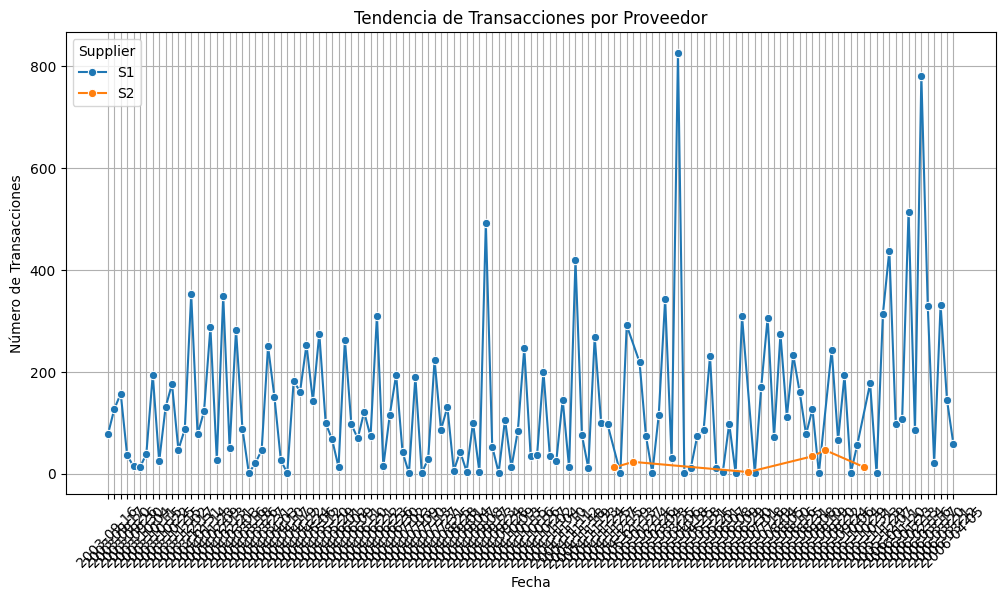

In [221]:
df_trend = df_inventory_suppliers.groupby(['OrderDate', 'SupplierName']).size().reset_index(name='Transactions')


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x='OrderDate', y='Transactions', hue='SupplierName', marker="o")


plt.title("Tendencia de Transacciones por Proveedor")
plt.xlabel("Fecha")
plt.ylabel("Número de Transacciones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Supplier")


plt.show()

### **Employee Sales**

In [225]:
df_order_employee = pd.merge(df_order_details, df_orders, on = 'OrderID')
df_order_employee = pd.merge(df_order_employee, df_employees, on = 'EmployeeID')

In [226]:
df_order_employee

,OrderDetailID,OrderID,ProductID,QuantitySold,UnitSalesPrice,total_price,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge,DeliveryTime,OrderYear,OrderMonth,OrderWeekday,EmployeeName
0,2,2,955,5,7.5,37.5,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,3,E1
1,3,2,958,5,8.5,42.5,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,3,E1
2,5,2,959,5,8.5,42.5,1,1,1,2003-07-10,2003-07-10,0.0,0,2003,7,3,E1
3,6,4,72,50,3.0,150.0,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7,4,E2
4,7,4,9,50,3.2,160.0,2,2,1,2003-07-11,2003-07-11,0.0,0,2003,7,4,E2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105265,114665,2470,4342,20,1.7,34.0,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,3,E7
105266,114666,2470,4419,10,1.9,19.0,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,3,E7
105267,114667,2470,4343,20,1.9,38.0,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,3,E7
105268,114668,2470,4421,10,2.1,21.0,231,8,1,2006-04-20,2006-04-20,0.0,0,2006,4,3,E7


**Sales per employee**

In [228]:
sales_employee = df_order_employee.groupby('EmployeeName').agg(
    TotalSales = ('OrderID', 'count'), 
    SoldProducts = ('QuantitySold', 'sum'), 
    TotalAmount = ('total_price', 'sum')
).reset_index()

sales_employee

,EmployeeName,TotalSales,SoldProducts,TotalAmount
0,E1,10605,84654,462245.20
1,E11,2292,16576,100737.70
2,E12,519,2667,16191.50
3,E13,9198,51825,334043.00
4,E14,898,4551,31793.60
5,E15,626,3860,28778.30
6,E2,12045,96265,453142.27
7,E5,52640,330749,1910300.30
8,E6,980,7293,32340.20
9,E7,15467,83410,569895.60


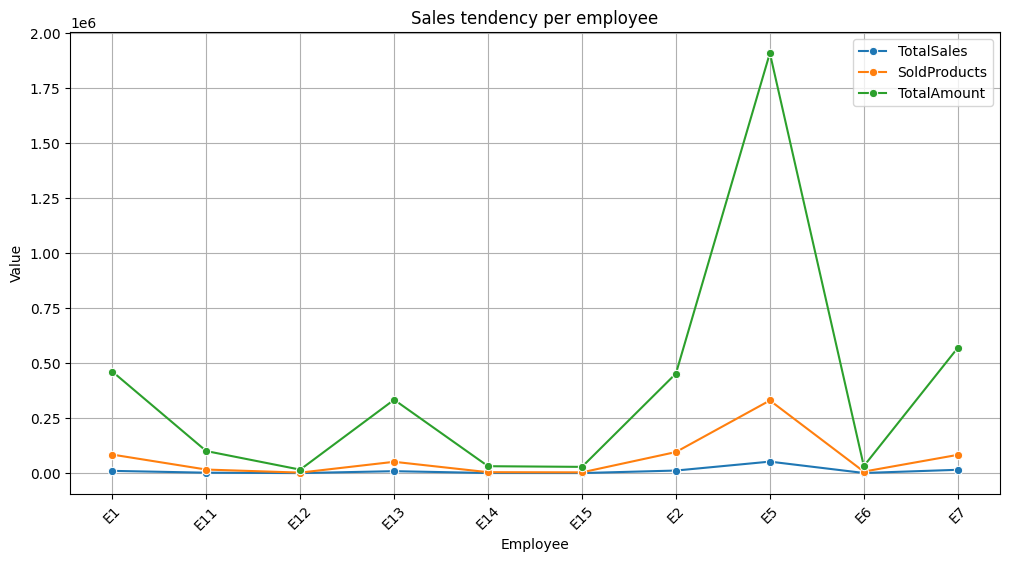

In [231]:
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_employee.melt(id_vars="EmployeeName", var_name="Metric", value_name="Value"), 
             x="EmployeeName", y="Value", hue="Metric", marker="o", palette="tab10")

plt.title("Sales tendency per employee")
plt.xlabel("Employee")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

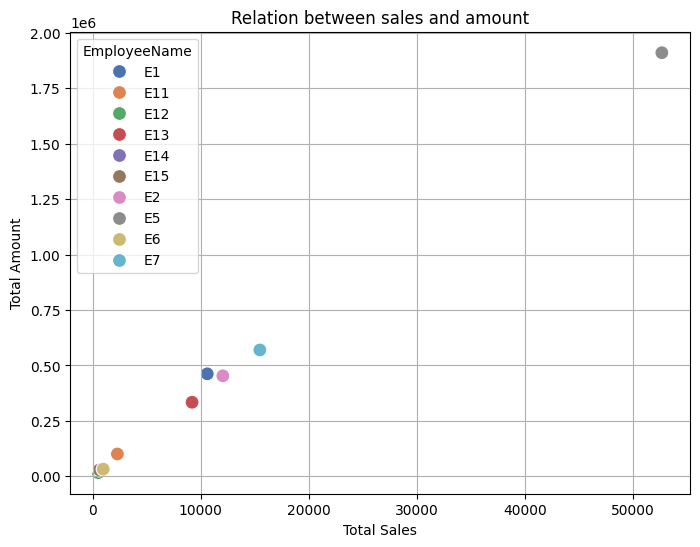

In [233]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=sales_employee, x="TotalSales", y="TotalAmount", hue="EmployeeName", palette="deep", s=100)

plt.title("Relation between sales and amount")
plt.xlabel("Total Sales")
plt.ylabel("Total Amount")
plt.grid(True)

plt.show()

**Customer per employee**

In [234]:
customer_employee = df_order_employee.groupby('EmployeeName')['CustomerID'].nunique()
list_customer = df_order_employee.groupby('EmployeeName')['CustomerID'].unique()

attended_customer = pd.DataFrame({
    'Nº customer': customer_employee,
    'Customers': list_customer
})

attended_customer

,Nº customer,Customers
EmployeeName,,
E1,83,"[1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 7, 14, 1..."
E11,34,"[22, 84, 145, 67, 32, 7, 82, 147, 148, 40, 149..."
E12,6,"[152, 64, 25, 190, 22, 18]"
E13,57,"[60, 7, 6, 18, 203, 22, 19, 153, 24, 161, 186,..."
E14,15,"[40, 21, 7, 22, 19, 117, 180, 199, 18, 2, 97, ..."
E15,7,"[186, 231, 241, 40, 245, 247, 18]"
E2,56,"[2, 7, 3, 12, 8, 5, 4, 14, 16, 18, 21, 6, 23, ..."
E5,154,"[13, 7, 67, 57, 21, 5, 2, 22, 1, 23, 25, 18, 4..."
E6,17,"[2, 21, 25, 8, 40, 55, 5, 18, 23, 45, 1, 13, 6..."


**Temporal Sales Tendecy by employee**

In [235]:
ventas_mensuales = df_order_employee.groupby([df_order_employee['OrderDate'].dt.to_period('M'),'EmployeeName'])['total_price'].sum().reset_index()
ventas_mensuales

,OrderDate,EmployeeName,total_price
0,2003-07,E1,42177.1
1,2003-07,E2,5849.5
2,2003-08,E1,66584.1
3,2003-08,E2,28953.5
4,2003-09,E1,38328.6
...,...,...,...
79,2006-03,E7,99486.5
80,2006-04,E1,18402.6
81,2006-04,E13,52933.4
82,2006-04,E15,712.4


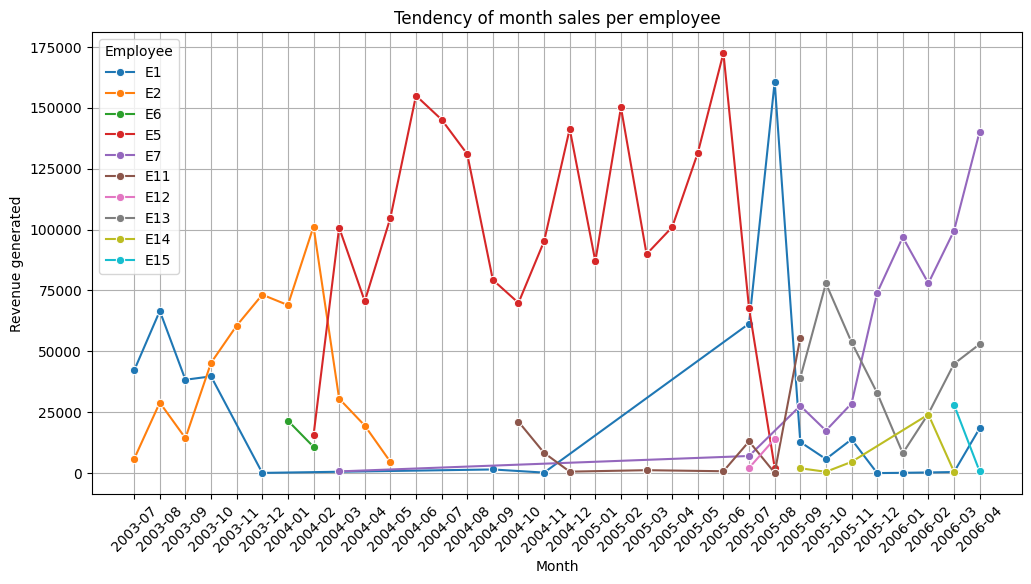

In [241]:
# Extract year and month from OrderDate to create a readable format for the x-axis
ventas_mensuales['YearMonth'] = ventas_mensuales['OrderDate'].dt.strftime('%Y-%m')

# Now, plot the lineplot using the formatted 'YearMonth' as x-axis
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_mensuales, x='YearMonth', y='total_price', hue='EmployeeName', marker='o')
plt.xlabel("Month")
plt.ylabel("Revenue generated")
plt.title("Tendency of month sales per employee")
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend(title="Employee")
plt.grid()
plt.show()


**Working period**

In [243]:
df_order_employee.dtypes

OrderDetailID                int64
OrderID                      int64
ProductID                    int64
QuantitySold                 int64
UnitSalesPrice             float64
total_price                float64
CustomerID                   int64
EmployeeID                   int64
ShippingMethodID             int64
OrderDate           datetime64[ns]
ShipDate                    object
FreightCharge              float64
DeliveryTime                 int64
OrderYear                    int64
OrderMonth                   int64
OrderWeekday                 int32
EmployeeName                object
dtype: object

In [248]:
employee = df_order_employee.groupby('EmployeeName').agg(
    startDate = ('OrderDate', 'min'), 
    endDate = ('OrderDate', 'max')
).reset_index()
employee

,EmployeeName,startDate,endDate
0,E1,2003-07-10,2006-04-13
1,E11,2004-10-15,2005-09-10
2,E12,2005-07-18,2005-08-01
3,E13,2005-09-16,2006-04-12
4,E14,2005-09-10,2006-03-10
5,E15,2006-03-15,2006-04-10
6,E2,2003-07-11,2004-05-13
7,E5,2004-02-19,2005-08-01
8,E6,2004-01-08,2004-02-24
9,E7,2004-03-22,2006-04-20


In [249]:
employee.dtypes

EmployeeName            object
startDate       datetime64[ns]
endDate         datetime64[ns]
dtype: object

In [257]:
years_range=range(2003,2007)
annual_coincidences = {}

for year in years_range:
    # Verificamos cuántos empleados estaban activos en cada año
    active_employees = employee[(employee['startDate'].dt.year <= year) & (employee['endDate'].dt.year >= year)]
    annual_coincidences[year] = len(active_employees)
    
annual_coincidences


{2003: 2, 2004: 6, 2005: 7, 2006: 5}

In [258]:
df_order_employee.columns

Index(['OrderDetailID', 'OrderID', 'ProductID', 'QuantitySold',
       'UnitSalesPrice', 'total_price', 'CustomerID', 'EmployeeID',
       'ShippingMethodID', 'OrderDate', 'ShipDate', 'FreightCharge',
       'DeliveryTime', 'OrderYear', 'OrderMonth', 'OrderWeekday',
       'EmployeeName'],
      dtype='object')

In [265]:
total_sales_year = df_order_employee.groupby('OrderYear')['total_price'].sum()
total_sales_year 

OrderYear
2003     415130.47
2004    1398162.80
2005    1508708.90
2006     617465.50
Name: total_price, dtype: float64

C:\Users\Carlota\AppData\Local\Temp\ipykernel_21020\4211136508.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left')


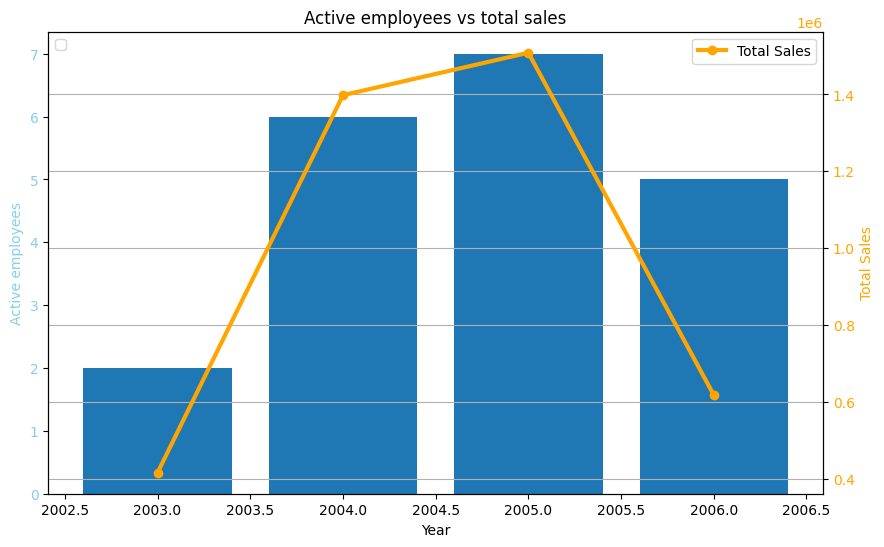

In [267]:

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(annual_coincidences.keys(), annual_coincidences.values())
ax1.set_xlabel('Year')
ax1.set_ylabel('Active employees', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(total_sales_year.index, total_sales_year.values, color='orange', marker='o', label='Total Sales', linewidth=3)
ax2.set_ylabel('Total Sales', color = 'orange')
ax2.tick_params(axis='y', labelcolor='orange')


plt.title('Active employees vs total sales')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **Análisis de preferencias del Cliente**

- Género y Línea de Producto
- Modelos Populares

## **Métodos de pago**

- Método de pagos más utilizados
- Interviene la cantidad?
- Sigue un patrón?

**Métodos de Pago Más Utilizados**

In [308]:
df_total_payments

,PaymentMethod,PaymentID,OrderID,PaymentDate,PaymentAmount
0,Cash,1,2,2003-07-10,603.50
1,Cash,2,4,2003-07-12,1288.00
2,Cash,4,5,2003-07-15,1800.00
3,Cash,5,6,2003-07-14,389.50
4,Cash,6,7,2003-07-15,1479.00
...,...,...,...,...,...
679,Bank Transfer,583,688,2004-04-09,2529.67
680,Bank Transfer,624,696,2004-04-01,1502.17
681,Bank Transfer,676,678,2004-03-30,313.70
682,Bank Transfer,682,709,2004-04-08,3263.70


In [311]:
frequency_table, proportion_table = f.create_frequency_table(df_total_payments, 'PaymentMethod')
frequency_table

PaymentMethod
Cash             648
Bank Transfer     36
Name: count, dtype: int64

C:\Users\Carlota\AppData\Local\Temp\ipykernel_18976\3182585281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentMethod', y='PaymentAmount', data=df_total_payments, palette='coolwarm')


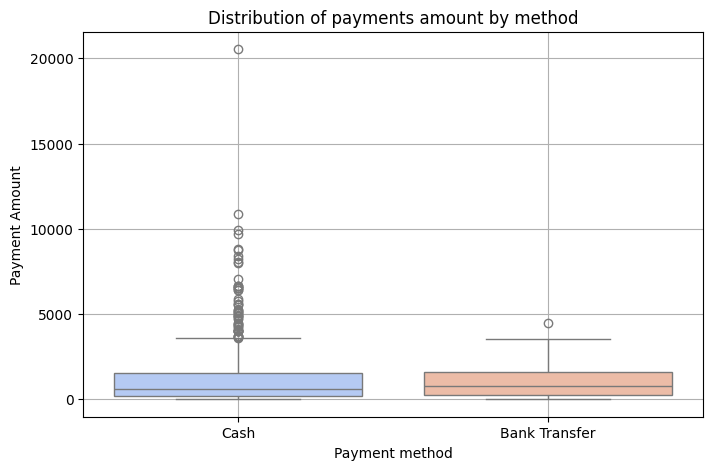

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='PaymentMethod', y='PaymentAmount', data=df_total_payments, palette='coolwarm')

plt.title('Distribution of payments amount by method')
plt.xlabel('Payment method')
plt.ylabel('Payment Amount')
plt.grid(True)

plt.show()
